In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn
import random as rn
import tensorflow as tf
%matplotlib inline
import os

In [2]:
import os
os.environ['PYTHONHASHSEED'] = '0'

In [3]:
np.random.seed(42)

In [4]:
rn.seed(42)

In [5]:
tf.random.set_seed(42)

In [6]:
#!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7082/874852/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1624091806&Signature=Jt0aIhuODzZtliJEtSFgXCXIlOuYhpDNQTu38WrR8PClBz5IVrdWB65ADsOXiazaLD6bqOv1OXs7bVsgy4jT0Qr836QTyCmUBeSGHbVDNZpc0TxMzBgNL7IWLIUB8n2z4hab%2BuMbeD%2F9D3KfpeH%2BmUO2W5PgWuKYm2mJB0yswezfe1NJQnBwWNSo0ax5DgEkrclTFLEr7x1%2FvJIq%2FgD7lfoRYVw9VQmu8YcQKGm%2Bfe2T3Wk0b2s0o7veujeG%2B920uzNVx536fS7%2FmkJDB15fvhIgBv1ktcoUDXRmrmoOLuKZeRL19vEcN7pz%2Fpj2VUXD3%2Fl1PsXK5X6tXz6dRGxzUg%3D%3D&response-content-disposition=attachment%3B+filename%3Dporto-seguro-safe-driver-prediction.zip" -c -O 'porto-seguro-safe-driver-prediction.zip'

In [7]:
#import zipfile
#for f in ['porto-seguro-safe-driver-prediction.zip']:
#    file=zipfile.ZipFile(f)
#    file.extractall()
#    file.close()

In [6]:
df=pd.read_csv('D:/porto-seguro-safe-driver-prediction/train.csv')

In [7]:
pd.options.display.max_columns=None

In [8]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

In [9]:
(df['target'].value_counts()/df.shape[0])*100

0    96.355248
1     3.644752
Name: target, dtype: float64

C:\Users\beast brothers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

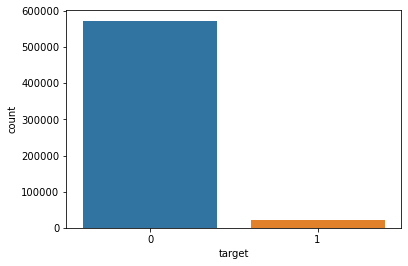

In [10]:
sn.countplot(df['target'])

In [11]:
(df['target'].value_counts()/df.shape[0])*100

0    96.355248
1     3.644752
Name: target, dtype: float64

<AxesSubplot:>

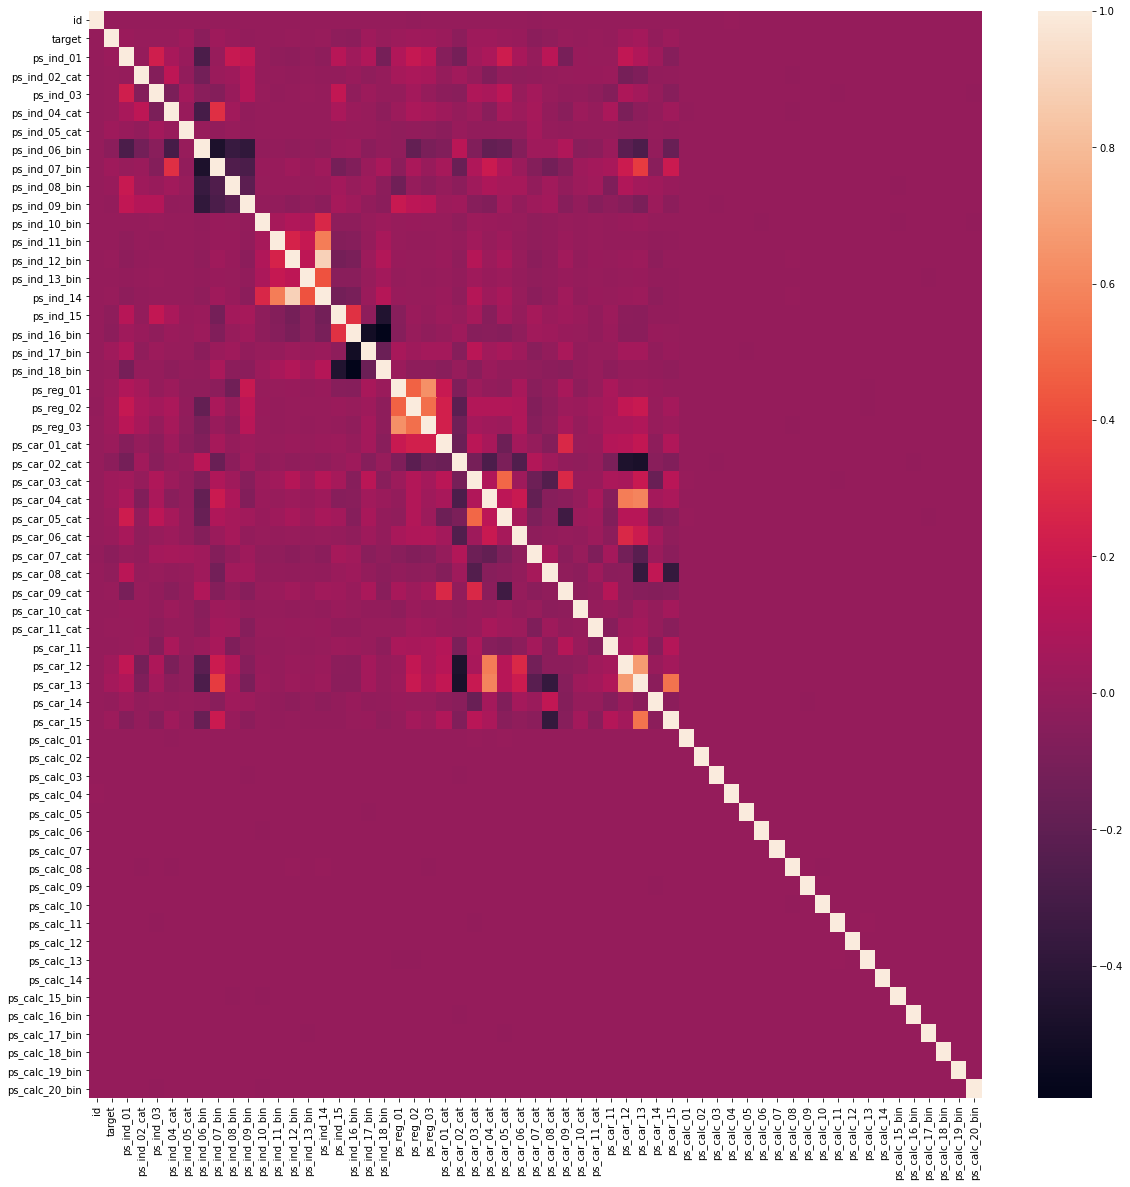

In [12]:
plt.figure(figsize=(20,20))
sn.heatmap(df.corr())

In [13]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

In [14]:
columns=list(df.columns)
categorical_columns=[]
for col in columns:
    if col.endswith('cat') or col.endswith('bin'):
        categorical_columns.append(col)

        

In [15]:
import pickle
with open('D:/porto-seguro-safe-driver-prediction/categorical_columns.pkl','wb') as f:
    pickle.dump(categorical_columns,f)

In [16]:
nulls={}

In [17]:
for col in columns:
    nulls[col]=df[df[col]==-1].shape[0]*100.0/df.shape[0]

In [18]:
#columns in which null values is more than 5%
for name,value in nulls.items():
    if value>5:
        print(name)

ps_reg_03
ps_car_03_cat
ps_car_05_cat
ps_car_14


In [19]:
for col in columns:
    if str(df[col].dtype).startswith('int') and not (col.endswith('cat') or col.endswith('bin')):
        print(f"for {col} we have {df[col].unique()} \n")

for id we have [      7       9      13 ... 1488017 1488021 1488027] 

for target we have [0 1] 

for ps_ind_01 we have [2 1 5 0 4 3 6 7] 

for ps_ind_03 we have [ 5  7  9  2  0  4  3  1 11  6  8 10] 

for ps_ind_14 we have [0 1 2 3 4] 

for ps_ind_15 we have [11  3 12  8  9  6 13  4 10  5  7  2  0  1] 

for ps_car_11 we have [ 2  3  1  0 -1] 

for ps_calc_04 we have [3 2 1 4 0 5] 

for ps_calc_05 we have [1 2 4 3 0 5 6] 

for ps_calc_06 we have [10  9  7  6  8  5  4  3  2  1  0] 

for ps_calc_07 we have [1 5 3 2 4 6 0 7 8 9] 

for ps_calc_08 we have [10  8 11  6  9  7  5 12  4  3  2] 

for ps_calc_09 we have [1 2 4 3 0 5 6 7] 

for ps_calc_10 we have [ 5  7  2 12  8 10 13 11  9 18  4 15  6 14 16  3  1 17  0 21 19 20 22 23
 25 24] 

for ps_calc_11 we have [ 9  3  4  2  7  6  5 10  8  1  0 13 11 12 14 15 16 19 17 18] 

for ps_calc_12 we have [ 1  2  0  5  3  4  6  7  8  9 10] 

for ps_calc_13 we have [ 5  1  7  4  0  3  6  2  8 10  9 11 12 13] 

for ps_calc_14 we have [ 8  9  7  3 10  6

In test data also if those columnns contain same values then they are ordinal columns else numeric columns

In [20]:
fill_values={}
for name,value in nulls.items():
    if value<=5 and value>0:
        if name.endswith('cat') or name.endswith('bin'):
            fill_values[name]=int(df[name].mode())
            df[name].replace(-1,int(df[name].mode()),inplace=True)
            
        else:
            dtype=df[col].dtype
            if str(dtype).startswith('int'):
                fill_values[name]=int(df[name].mode())
                df[name].replace(-1,int(df[name].mode()),inplace=True)
            else:
                fill_values[name]=int(df[name].mean())
                df[name].replace(-1,float(df[name].mean()),inplace=True)

In [21]:
fill_values

{'ps_ind_02_cat': 1,
 'ps_ind_04_cat': 0,
 'ps_ind_05_cat': 0,
 'ps_car_01_cat': 11,
 'ps_car_02_cat': 1,
 'ps_car_07_cat': 1,
 'ps_car_09_cat': 2,
 'ps_car_11': 3,
 'ps_car_12': 0}

In [22]:
with open('D:/porto-seguro-safe-driver-prediction/fill_values.pkl','wb') as f:
    pickle.dump(fill_values,f)

In [23]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [24]:
def reduce_memory(df):
    for col in list(df.columns):
        dtype=df[col].dtype
        if str(dtype).startswith('int'):
            min_val=df[col].min()
            max_val=df[col].max()
            if min_val>np.iinfo(np.int8).min and max_val<np.iinfo(np.int8).max:
                df[col]=df[col].astype(np.int8)
            elif min_val>np.iinfo(np.int16).min and max_val<np.iinfo(np.int16).max:
                df[col]=df[col].astype(np.int16)
            elif min_val>np.iinfo(np.int32).min and max_val<np.iinfo(np.int32).max:
                df[col]=df[col].astype(np.int32)
            elif min_val>np.iinfo(np.in64).min and max_val<np.iinfo(np.int64).max:
                df[col]=df[col].astype(np.int64)
        elif str(dtype).startswith('float'):
            min_val=df[col].min()
            max_val=df[col].max()
            if min_val>np.finfo(np.float16).min and max_val<np.finfo(np.float16).max:
                df[col]=df[col].astype(np.float16)
            elif min_val>np.finfo(np.float32).min and max_val<np.finfo(np.float32).max:
                df[col]=df[col].astype(np.float32)
            elif min_val>np.finfo(np.float64).min and max_val<np.finfo(np.float64).max:
                df[col]=df[col].astype(np.float64)
        else:
            df[col]=df[col].astype('category')
    return df

In [25]:
from tqdm import tqdm
import pickle
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import optuna
import gc

# metric to improve

In [26]:
def gini(y, pred):
    g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype='float')
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(y) + 1) / 2.
    return gs / len(y)

## Non-tree based methods

In [31]:
for col in categorical_columns:
    if col.endswith('cat'):
        encoder=OneHotEncoder(drop='first', sparse=False)
        transformed=encoder.fit_transform(df[[col]])
        enc_columns=list(f'{col}_{i}' for i in encoder.categories_[0][1:])
        temp=pd.DataFrame(transformed,columns=enc_columns)
        df.drop(col,axis=1,inplace=True)
        df=df.join(temp)

In [32]:
df.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_1,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_5,ps_ind_05_cat_6,ps_car_01_cat_1,ps_car_01_cat_2,ps_car_01_cat_3,ps_car_01_cat_4,ps_car_01_cat_5,ps_car_01_cat_6,ps_car_01_cat_7,ps_car_01_cat_8,ps_car_01_cat_9,ps_car_01_cat_10,ps_car_01_cat_11,ps_car_02_cat_1,ps_car_03_cat_0,ps_car_03_cat_1,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_05_cat_0,ps_car_05_cat_1,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_1,ps_car_08_cat_1,ps_car_09_cat_1,ps_car_09_cat_2,ps_car_09_cat_3,ps_car_09_cat_4,ps_car_10_cat_1,ps_car_10_cat_2,ps_car_11_cat_2,ps_car_11_cat_3,ps_car_11_cat_4,ps_car_11_cat_5,ps_car_11_cat_6,ps_car_11_cat_7,ps_car_11_cat_8,ps_car_11_cat_9,ps_car_11_cat_10,ps_car_11_cat_11,ps_car_11_cat_12,ps_car_11_cat_13,ps_car_11_cat_14,ps_car_11_cat_15,ps_car_11_cat_16,ps_car_11_cat_17,ps_car_11_cat_18,ps_car_11_cat_19,ps_car_11_cat_20,ps_car_11_cat_21,ps_car_11_cat_22,ps_car_11_cat_23,ps_car_11_cat_24,ps_car_11_cat_25,ps_car_11_cat_26,ps_car_11_cat_27,ps_car_11_cat_28,ps_car_11_cat_29,ps_car_11_cat_30,ps_car_11_cat_31,ps_car_11_cat_32,ps_car_11_cat_33,ps_car_11_cat_34,ps_car_11_cat_35,ps_car_11_cat_36,ps_car_11_cat_37,ps_car_11_cat_38,ps_car_11_cat_39,ps_car_11_cat_40,ps_car_11_cat_41,ps_car_11_cat_42,ps_car_11_cat_43,ps_car_11_cat_44,ps_car_11_cat_45,ps_car_11_cat_46,ps_car_11_cat_47,ps_car_11_cat_48,ps_car_11_cat_49,ps_car_11_cat_50,ps_car_11_cat_51,ps_car_11_cat_52,ps_car_11_cat_53,ps_car_11_cat_54,ps_car_11_cat_55,ps_car_11_cat_56,ps_car_11_cat_57,ps_car_11_cat_58,ps_car_11_cat_59,ps_car_11_cat_60,ps_car_11_cat_61,ps_car_11_cat_62,ps_car_11_cat_63,ps_car_11_cat_64,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,7,0,2,5,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [21]:
x=df.drop(['target','id'],axis=1).values
y=df['target'].values
skf=StratifiedKFold(n_splits=5)
df['kfold']=-1
for i,(train,test) in enumerate(skf.split(x,y)):
    df.loc[test,'kfold']=i

In [24]:
df=reduce_memory(df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Columns: 208 entries, id to ps_car_11_cat_104
dtypes: float16(173), int32(1), int8(34)
memory usage: 218.0 MB


In [26]:
df.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_1,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_5,ps_ind_05_cat_6,ps_car_01_cat_1,ps_car_01_cat_2,ps_car_01_cat_3,ps_car_01_cat_4,ps_car_01_cat_5,ps_car_01_cat_6,ps_car_01_cat_7,ps_car_01_cat_8,ps_car_01_cat_9,ps_car_01_cat_10,ps_car_01_cat_11,ps_car_02_cat_1,ps_car_03_cat_0,ps_car_03_cat_1,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_05_cat_0,ps_car_05_cat_1,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_1,ps_car_08_cat_1,ps_car_09_cat_1,ps_car_09_cat_2,ps_car_09_cat_3,ps_car_09_cat_4,ps_car_10_cat_1,ps_car_10_cat_2,ps_car_11_cat_2,ps_car_11_cat_3,ps_car_11_cat_4,ps_car_11_cat_5,ps_car_11_cat_6,ps_car_11_cat_7,ps_car_11_cat_8,ps_car_11_cat_9,ps_car_11_cat_10,ps_car_11_cat_11,ps_car_11_cat_12,ps_car_11_cat_13,ps_car_11_cat_14,ps_car_11_cat_15,ps_car_11_cat_16,ps_car_11_cat_17,ps_car_11_cat_18,ps_car_11_cat_19,ps_car_11_cat_20,ps_car_11_cat_21,ps_car_11_cat_22,ps_car_11_cat_23,ps_car_11_cat_24,ps_car_11_cat_25,ps_car_11_cat_26,ps_car_11_cat_27,ps_car_11_cat_28,ps_car_11_cat_29,ps_car_11_cat_30,ps_car_11_cat_31,ps_car_11_cat_32,ps_car_11_cat_33,ps_car_11_cat_34,ps_car_11_cat_35,ps_car_11_cat_36,ps_car_11_cat_37,ps_car_11_cat_38,ps_car_11_cat_39,ps_car_11_cat_40,ps_car_11_cat_41,ps_car_11_cat_42,ps_car_11_cat_43,ps_car_11_cat_44,ps_car_11_cat_45,ps_car_11_cat_46,ps_car_11_cat_47,ps_car_11_cat_48,ps_car_11_cat_49,ps_car_11_cat_50,ps_car_11_cat_51,ps_car_11_cat_52,ps_car_11_cat_53,ps_car_11_cat_54,ps_car_11_cat_55,ps_car_11_cat_56,ps_car_11_cat_57,ps_car_11_cat_58,ps_car_11_cat_59,ps_car_11_cat_60,ps_car_11_cat_61,ps_car_11_cat_62,ps_car_11_cat_63,ps_car_11_cat_64,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,7,0,2,5,0,1,0,0,0,0,0,0,0,11,0,1,0,0.700195,0.199951,0.718262,2,0.399902,0.883789,0.370850,3.605469,0.600098,0.500000,0.199951,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [30]:
import optuna

logistic

In [ ]:
for i in tqdm(range(5)):
    train_data=df[df['kfold']!=i].drop(['kfold','id'],axis=1).reset_index(drop=True)
    test_data=df[df['kfold']==i].drop(['kfold','id'],axis=1).reset_index(drop=True)
    x_train,y_train=train_data.drop('target',axis=1).values,train_data['target'].values
    x_test,y_test=test_data.drop('target',axis=1).values,test_data['target'].values
    smote=SMOTE(sampling_strategy='minority')
    scaler=StandardScaler()
    x_train,y_train=smote.fit_resample(x_train,y_train)
    x_train=scaler.fit_transform(x_train)
    x_test=scaler.transform(x_test)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/x_train_{i}.pkl",'wb') as f:
        pickle.dump(x_train,f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/y_train_{i}.pkl",'wb') as f:
        pickle.dump(y_train,f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/x_test_{i}.pkl",'wb') as f:
        pickle.dump(x_test,f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/y_test_{i}.pkl",'wb') as f:
        pickle.dump(y_test,f)

In [ ]:
def objective(trial):
    C=trial.suggest_uniform('C',0.1,10)
    solver=trial.suggest_categorical('solver',['newton-cg','sag' , 'saga'] )
    scores=[]
    for i in tqdm(range(5)):
        train_data=df[df['kfold']!=i].drop(['kfold','id'],axis=1).reset_index(drop=True)
        test_data=df[df['kfold']==i].drop(['kfold','id'],axis=1).reset_index(drop=True)
        x_train,y_train=train_data.drop('target',axis=1).values,train_data['target'].values
        x_test,y_test=test_data.drop('target',axis=1).values,test_data['target'].values
        smote=SMOTE(sampling_strategy='minority')
        scaler=StandardScaler()
        x_train,y_train=smote.fit_resample(x_train,y_train)
        x_train=scaler.fit_transform(x_train)
        x_test=scaler.transform(x_test)
        model=LogisticRegression(C=C,n_jobs=-1,solver=solver,multi_class='ovr')
        model.fit(x_train,y_train)
        predictions=model.predict_proba(x_test)
        predictions=predictions[:,1]
        score=roc_auc_score(y_test,predictions)
        scores.append(score)
    result=np.mean(scores)
    return result
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

In [ ]:
'C': 2.3011903706491337, 'solver': 'newton-cg'

KNN

In [31]:
#for n in tqdm(range(10,50,5)):
#    neighbor_score={}
#    scores=[]
#    for i in tqdm(range(5)):
#        with open(f"data/x_train_{i}.pkl",'rb') as f:
#            x_train=pickle.load(f)
#        with open(f"data/y_train_{i}.pkl",'rb') as f:
#            y_train=pickle.load(f)
#        with open(f"data/x_test_{i}.pkl",'rb') as f:
#            x_test=pickle.load(f)
#        with open(f"data/y_test_{i}.pkl",'rb') as f:
#            y_test=pickle.load(f)
#        print('fitting model')
#        model=KNeighborsClassifier(n_neighbors=n,n_jobs=-1)
#        model.fit(x_train,y_train)
#        print('predicting')
#        predictions=model.predict_proba(x_test)
#        predictions=predictions[:,1]
#        score=roc_auc_score(y_test,predictions)
#        scores.append(score)
#    result=np.mean(scores)
#    print(f"for {n} neighbors we got {result}")
#    neighbor_score[n]=result

In [ ]:
plt.figure(figsize=(30,15))
sn.linplot(list(neighbor_score.keys()),list(neighbor_score.values))

## Tree-based models

In [27]:
encoders={}
for col in categorical_columns:
    if col.endswith('cat'):
        encoder=LabelEncoder()
        df[col]=encoder.fit_transform(df[col])
        encoders[col]=encoder
x=df.drop(['target','id'],axis=1).values
y=df['target'].values
skf=StratifiedKFold(n_splits=5)
df['kfold']=-1
for i,(train,test) in enumerate(skf.split(x,y)):
    df.loc[test,'kfold']=i
df=reduce_memory(df)

In [28]:
encoders

{'ps_ind_02_cat': LabelEncoder(),
 'ps_ind_04_cat': LabelEncoder(),
 'ps_ind_05_cat': LabelEncoder(),
 'ps_car_01_cat': LabelEncoder(),
 'ps_car_02_cat': LabelEncoder(),
 'ps_car_03_cat': LabelEncoder(),
 'ps_car_04_cat': LabelEncoder(),
 'ps_car_05_cat': LabelEncoder(),
 'ps_car_06_cat': LabelEncoder(),
 'ps_car_07_cat': LabelEncoder(),
 'ps_car_08_cat': LabelEncoder(),
 'ps_car_09_cat': LabelEncoder(),
 'ps_car_10_cat': LabelEncoder(),
 'ps_car_11_cat': LabelEncoder()}

In [29]:
for i in tqdm(range(5)):
    train_data=df[df['kfold']!=i].drop(['kfold','id'],axis=1).reset_index(drop=True)
    test_data=df[df['kfold']==i].drop(['kfold','id'],axis=1).reset_index(drop=True)
    x_train,y_train=train_data.drop('target',axis=1).values,train_data['target'].values
    x_test,y_test=test_data.drop('target',axis=1).values,test_data['target'].values
    smote=SMOTE(sampling_strategy='minority')
    x_train,y_train=smote.fit_resample(x_train,y_train)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/x_train_{i}.pkl",'wb') as f:
        pickle.dump(x_train,f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/y_train_{i}.pkl",'wb') as f:
        pickle.dump(y_train,f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/x_test_{i}.pkl",'wb') as f:
        pickle.dump(x_test,f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/y_test_{i}.pkl",'wb') as f:
        pickle.dump(y_test,f)
import optuna

100%|██████████| 5/5 [00:35<00:00,  7.06s/it]


In [30]:
with open('D:/porto-seguro-safe-driver-prediction/encoders.pkl','wb') as f:
    pickle.dump(encoders,f)

random forest classifier

In [33]:
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators',100,2000,50)
    max_depth=trial.suggest_int('max_depth',4,30)
    min_samples_split=trial.suggest_discrete_uniform('min_samples_split',0.01,0.4,0.01)
    scores=[]
    for i in tqdm(range(5)):
        with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/x_train_{i}.pkl",'rb') as f:
            x_train=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/y_train_{i}.pkl",'rb') as f:
            y_train=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/x_test_{i}.pkl",'rb') as f:
            x_test=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/y_test_{i}.pkl",'rb') as f:
            y_test=pickle.load(f)
        model=RandomForestClassifier(n_estimators=n_estimators,
                                   criterion='gini',
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   bootstrap=True,
                                   n_jobs=-1)
        model.fit(x_train,y_train)
        #predictions=model.predict_proba(x_test)
        #predictions=predictions[:,1]
        #score=roc_auc_score(y_test,predictions)
        predictions=model.predict(x_test)
        score=gini(y_test,predictions)
        scores.append(score)
    result=np.mean(scores)
    return result
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=125)

[I 2021-06-28 12:04:31,072] A new study created in memory with name: no-name-8fff97c7-e706-43c3-935b-e289c6be6c7a
  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-31-e46e9821ad5f>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
 20%|██        | 1/5 [03:00<12:03, 180.85s/it]<ipython-input-31-e46e9821ad5f>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more det

KeyboardInterrupt: 

xgboost

In [34]:
from optuna.samplers import TPESampler

In [32]:
def objective(trial):
    max_depth=trial.suggest_int('max_depth',4,23)
    subsample=trial.suggest_discrete_uniform('subsample',0.6,0.95,0.01)
    colsample_bytree=trial.suggest_discrete_uniform('colsample_bytree',0.6,0.95,0.01)
    reg_lambda=trial.suggest_loguniform("reg_lambda", 1e-3, 10)
    min_child_weight=trial.suggest_int('min_child_weight',1,500,1)
    gamma=trial.suggest_loguniform("gamma", 1e-3, 10)
    lr=trial.suggest_uniform('learning_rate',0.01,0.3)
    n_estimators=trial.suggest_int('n_estimators',100,2500,50)
    scores=[]
    for i in tqdm(range(5)):
        with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/x_train_{i}.pkl",'rb') as f:
            x_train=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/y_train_{i}.pkl",'rb') as f:
            y_train=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/x_test_{i}.pkl",'rb') as f:
            x_test=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/y_test_{i}.pkl",'rb') as f:
            y_test=pickle.load(f)
        model=XGBClassifier(max_depth=max_depth,n_estimators=n_estimators,learning_rate=lr,
               objective='binary:logistic',min_child_weight=min_child_weight,
               subsample=subsample,
               colsample_bytree=colsample_bytree,gamma=gamma,
               reg_lambda=reg_lambda,random_state=42,tree_method='gpu_hist')
        model.fit(x_train, y_train,verbose=False)
        #predictions=model.predict_proba(x_test)
        #predictions=predictions[:,1]
        #score=roc_auc_score(y_test,predictions)
        predictions=model.predict(x_test)
        score=gini(y_test,predictions)
        scores.append(score)
    result=np.mean(scores)
    return result
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200,show_progress_bar=True)

[I 2021-06-26 15:43:58,214] A new study created in memory with name: no-name-0651bcdb-94f3-4bb5-a66f-0c706e1bd110
C:\Users\beast brothers\anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()



100%|██████████| 5/5 [32:37<00:00, 391.49s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 16:16:35,710] Trial 0 finished with value: 0.5638300854511753 and parameters: {'max_depth': 19, 'subsample': 0.9099999999999999, 'colsample_bytree': 0.61, 'reg_lambda': 6.976261529821607, 'min_child_weight': 193, 'gamma': 0.07193995397767709, 'learning_rate': 0.2858030497096454, 'n_estimators': 2500}. Best is trial 0 with value: 0.5638300854511753.



100%|██████████| 5/5 [06:29<00:00, 77.99s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 16:23:05,711] Trial 1 finished with value: 0.6249848417433577 and parameters: {'max_depth': 7, 'subsample': 0.9199999999999999, 'colsample_bytree': 0.64, 'reg_lambda': 0.0014150519626391312, 'min_child_weight': 200, 'gamma': 3.540839969611533, 'learning_rate': 0.20771392217285636, 'n_estimators': 1200}. Best is trial 1 with value: 0.6249848417433577.



100%|██████████| 5/5 [07:03<00:00, 84.68s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 16:30:09,128] Trial 2 finished with value: 0.6324589583160339 and parameters: {'max_depth': 20, 'subsample': 0.9199999999999999, 'colsample_bytree': 0.77, 'reg_lambda': 0.0031340503579698757, 'min_child_weight': 255, 'gamma': 0.4929066743401628, 'learning_rate': 0.02093599226007463, 'n_estimators': 350}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [08:37<00:00, 103.59s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 16:38:47,112] Trial 3 finished with value: 0.6214956682666103 and parameters: {'max_depth': 11, 'subsample': 0.8999999999999999, 'colsample_bytree': 0.85, 'reg_lambda': 1.0083915882348111, 'min_child_weight': 324, 'gamma': 2.2694620319070817, 'learning_rate': 0.09133876932688234, 'n_estimators': 750}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [19:20<00:00, 232.14s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 16:58:07,866] Trial 4 finished with value: 0.5982739239206103 and parameters: {'max_depth': 20, 'subsample': 0.9199999999999999, 'colsample_bytree': 0.63, 'reg_lambda': 0.4678018306542387, 'min_child_weight': 269, 'gamma': 0.003419864288702754, 'learning_rate': 0.13958437679350522, 'n_estimators': 1150}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [06:59<00:00, 83.99s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 17:05:07,869] Trial 5 finished with value: 0.6036403391833914 and parameters: {'max_depth': 20, 'subsample': 0.9199999999999999, 'colsample_bytree': 0.7, 'reg_lambda': 0.4073632141165017, 'min_child_weight': 245, 'gamma': 0.011901982552508999, 'learning_rate': 0.2178007682131551, 'n_estimators': 400}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [09:30<00:00, 114.08s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 17:14:38,293] Trial 6 finished with value: 0.6156277909003351 and parameters: {'max_depth': 18, 'subsample': 0.76, 'colsample_bytree': 0.6599999999999999, 'reg_lambda': 0.006177736861854251, 'min_child_weight': 294, 'gamma': 0.040175094906111805, 'learning_rate': 0.10382601833083903, 'n_estimators': 700}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [10:47<00:00, 129.41s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 17:25:25,408] Trial 7 finished with value: 0.6127640456610017 and parameters: {'max_depth': 12, 'subsample': 0.61, 'colsample_bytree': 0.6699999999999999, 'reg_lambda': 0.007959295465236833, 'min_child_weight': 295, 'gamma': 1.2333022685757915, 'learning_rate': 0.11315868734785464, 'n_estimators': 1000}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [19:52<00:00, 238.43s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 17:45:17,591] Trial 8 finished with value: 0.5728217599990443 and parameters: {'max_depth': 17, 'subsample': 0.73, 'colsample_bytree': 0.86, 'reg_lambda': 0.008898004054645223, 'min_child_weight': 100, 'gamma': 0.002403917435995106, 'learning_rate': 0.161661386990775, 'n_estimators': 1300}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [22:34<00:00, 270.85s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 18:07:51,871] Trial 9 finished with value: 0.5802463961780611 and parameters: {'max_depth': 11, 'subsample': 0.61, 'colsample_bytree': 0.85, 'reg_lambda': 0.004489691746216742, 'min_child_weight': 359, 'gamma': 0.00554801788879502, 'learning_rate': 0.23308375505395765, 'n_estimators': 2500}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [29:25<00:00, 353.11s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 18:37:17,495] Trial 10 finished with value: 0.6222296691754745 and parameters: {'max_depth': 23, 'subsample': 0.83, 'colsample_bytree': 0.77, 'reg_lambda': 0.048451044105966144, 'min_child_weight': 499, 'gamma': 0.3280626269199254, 'learning_rate': 0.04938661766337939, 'n_estimators': 1850}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [01:46<00:00, 21.39s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 18:39:04,508] Trial 11 finished with value: 0.5705673969909039 and parameters: {'max_depth': 4, 'subsample': 0.85, 'colsample_bytree': 0.75, 'reg_lambda': 0.0012600925539840622, 'min_child_weight': 121, 'gamma': 7.62645668519888, 'learning_rate': 0.01815241202283008, 'n_estimators': 200}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [08:27<00:00, 101.57s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 18:47:32,384] Trial 12 finished with value: 0.6265042328799112 and parameters: {'max_depth': 5, 'subsample': 0.95, 'colsample_bytree': 0.72, 'reg_lambda': 0.0010014339441502614, 'min_child_weight': 421, 'gamma': 9.171312073386492, 'learning_rate': 0.20055339984088713, 'n_estimators': 1750}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [20:49<00:00, 249.80s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 19:08:21,457] Trial 13 finished with value: 0.581267450367007 and parameters: {'max_depth': 15, 'subsample': 0.84, 'colsample_bytree': 0.95, 'reg_lambda': 0.001018703893904179, 'min_child_weight': 441, 'gamma': 0.4687972107373681, 'learning_rate': 0.2729876299063916, 'n_estimators': 1800}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [08:01<00:00, 96.30s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 19:16:23,020] Trial 14 finished with value: 0.6276634568454547 and parameters: {'max_depth': 6, 'subsample': 0.69, 'colsample_bytree': 0.72, 'reg_lambda': 0.03603739608556798, 'min_child_weight': 434, 'gamma': 9.78247998471514, 'learning_rate': 0.17553765935303806, 'n_estimators': 2000}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [45:18<00:00, 543.71s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 20:01:41,677] Trial 15 finished with value: 0.5916442095414666 and parameters: {'max_depth': 23, 'subsample': 0.6799999999999999, 'colsample_bytree': 0.8099999999999999, 'reg_lambda': 0.050857133342773905, 'min_child_weight': 7, 'gamma': 0.48814338849647687, 'learning_rate': 0.05098436700272345, 'n_estimators': 2250}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [20:37<00:00, 247.47s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 20:22:19,127] Trial 16 finished with value: 0.5968679050616841 and parameters: {'max_depth': 7, 'subsample': 0.6799999999999999, 'colsample_bytree': 0.79, 'reg_lambda': 0.0252547808553063, 'min_child_weight': 389, 'gamma': 0.18779152082580405, 'learning_rate': 0.17173553877908468, 'n_estimators': 2100}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [18:11<00:00, 218.22s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 20:40:30,288] Trial 17 finished with value: 0.630776474476442 and parameters: {'max_depth': 15, 'subsample': 0.6799999999999999, 'colsample_bytree': 0.73, 'reg_lambda': 0.11030960558252045, 'min_child_weight': 497, 'gamma': 1.129016170128784, 'learning_rate': 0.015387276431479524, 'n_estimators': 1450}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [31:20<00:00, 376.13s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 21:11:51,016] Trial 18 finished with value: 0.6152281708200261 and parameters: {'max_depth': 15, 'subsample': 0.65, 'colsample_bytree': 0.9099999999999999, 'reg_lambda': 0.17202203312993244, 'min_child_weight': 35, 'gamma': 1.1404593362566766, 'learning_rate': 0.018450842844345713, 'n_estimators': 1550}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [18:53<00:00, 226.70s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 21:30:44,572] Trial 19 finished with value: 0.623143726386217 and parameters: {'max_depth': 22, 'subsample': 0.8, 'colsample_bytree': 0.8099999999999999, 'reg_lambda': 2.6240744041803468, 'min_child_weight': 494, 'gamma': 0.029859449433025043, 'learning_rate': 0.05576364052723093, 'n_estimators': 1450}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [03:13<00:00, 38.74s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 21:33:58,352] Trial 20 finished with value: 0.6129715426482557 and parameters: {'max_depth': 16, 'subsample': 0.73, 'colsample_bytree': 0.75, 'reg_lambda': 0.28306812886075045, 'min_child_weight': 115, 'gamma': 0.1869782824687377, 'learning_rate': 0.01275108116490333, 'n_estimators': 100}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [11:59<00:00, 143.87s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 21:45:57,775] Trial 21 finished with value: 0.6220924826609017 and parameters: {'max_depth': 13, 'subsample': 0.6599999999999999, 'colsample_bytree': 0.7, 'reg_lambda': 0.07822446792254237, 'min_child_weight': 463, 'gamma': 4.415398136215228, 'learning_rate': 0.1331585102713292, 'n_estimators': 2150}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [16:02<00:00, 192.60s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 22:02:00,852] Trial 22 finished with value: 0.590536584046361 and parameters: {'max_depth': 9, 'subsample': 0.72, 'colsample_bytree': 0.73, 'reg_lambda': 0.013353238111713954, 'min_child_weight': 393, 'gamma': 1.8196592941232952, 'learning_rate': 0.2531780288244382, 'n_estimators': 1600}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [08:49<00:00, 105.93s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 22:10:50,604] Trial 23 finished with value: 0.6243842890075486 and parameters: {'max_depth': 14, 'subsample': 0.64, 'colsample_bytree': 0.69, 'reg_lambda': 0.019706926813179978, 'min_child_weight': 496, 'gamma': 0.7423751815354734, 'learning_rate': 0.07797676295361827, 'n_estimators': 850}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [10:29<00:00, 125.83s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 22:21:19,825] Trial 24 finished with value: 0.6260295871356318 and parameters: {'max_depth': 21, 'subsample': 0.7, 'colsample_bytree': 0.77, 'reg_lambda': 0.002730479569497823, 'min_child_weight': 342, 'gamma': 9.049221427897987, 'learning_rate': 0.18203779842763565, 'n_estimators': 2000}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [06:16<00:00, 75.27s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 22:27:36,264] Trial 25 finished with value: 0.6300022181065756 and parameters: {'max_depth': 9, 'subsample': 0.76, 'colsample_bytree': 0.73, 'reg_lambda': 0.04235397636083356, 'min_child_weight': 455, 'gamma': 0.2292609607441931, 'learning_rate': 0.031808815547338234, 'n_estimators': 500}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [06:11<00:00, 74.33s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 22:33:47,964] Trial 26 finished with value: 0.6320845277526479 and parameters: {'max_depth': 9, 'subsample': 0.76, 'colsample_bytree': 0.8099999999999999, 'reg_lambda': 0.11435046168177829, 'min_child_weight': 169, 'gamma': 0.2573265079462539, 'learning_rate': 0.038830448244501756, 'n_estimators': 450}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [05:07<00:00, 61.50s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 22:38:55,518] Trial 27 finished with value: 0.6269017018990581 and parameters: {'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.83, 'reg_lambda': 0.13928227216204106, 'min_child_weight': 168, 'gamma': 0.09964858730062193, 'learning_rate': 0.07434995430199251, 'n_estimators': 350}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [11:25<00:00, 137.10s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 22:50:21,101] Trial 28 finished with value: 0.6220908700175848 and parameters: {'max_depth': 13, 'subsample': 0.79, 'colsample_bytree': 0.8899999999999999, 'reg_lambda': 0.10702606845488716, 'min_child_weight': 57, 'gamma': 0.001032443508729766, 'learning_rate': 0.041260737816876183, 'n_estimators': 550}. Best is trial 2 with value: 0.6324589583160339.



100%|██████████| 5/5 [17:58<00:00, 215.66s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 23:08:19,453] Trial 29 finished with value: 0.6349759401168088 and parameters: {'max_depth': 18, 'subsample': 0.88, 'colsample_bytree': 0.79, 'reg_lambda': 0.9538549240737468, 'min_child_weight': 196, 'gamma': 0.04426782875018241, 'learning_rate': 0.012035417694203621, 'n_estimators': 950}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [16:01<00:00, 192.33s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 23:24:21,153] Trial 30 finished with value: 0.6154954219460695 and parameters: {'max_depth': 18, 'subsample': 0.8899999999999999, 'colsample_bytree': 0.8, 'reg_lambda': 7.486416797072511, 'min_child_weight': 208, 'gamma': 0.0486070972150289, 'learning_rate': 0.06473225097317677, 'n_estimators': 950}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [06:30<00:00, 78.18s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 23:30:52,114] Trial 31 finished with value: 0.621339284683499 and parameters: {'max_depth': 19, 'subsample': 0.87, 'colsample_bytree': 0.78, 'reg_lambda': 1.2036775381911131, 'min_child_weight': 177, 'gamma': 0.01839107410584114, 'learning_rate': 0.012394954595946764, 'n_estimators': 250}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [11:30<00:00, 138.06s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 23:42:22,485] Trial 32 finished with value: 0.6325402641260263 and parameters: {'max_depth': 17, 'subsample': 0.94, 'colsample_bytree': 0.76, 'reg_lambda': 2.60244464810209, 'min_child_weight': 144, 'gamma': 0.09331087018623598, 'learning_rate': 0.027733744408051077, 'n_estimators': 600}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [10:26<00:00, 125.26s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-26 23:52:48,849] Trial 33 finished with value: 0.6297576384550194 and parameters: {'max_depth': 17, 'subsample': 0.88, 'colsample_bytree': 0.83, 'reg_lambda': 3.648515756489417, 'min_child_weight': 229, 'gamma': 0.07843700060110612, 'learning_rate': 0.03557024522750073, 'n_estimators': 650}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [10:52<00:00, 130.42s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 00:03:40,997] Trial 34 finished with value: 0.6320166467941868 and parameters: {'max_depth': 20, 'subsample': 0.95, 'colsample_bytree': 0.75, 'reg_lambda': 1.02693132380957, 'min_child_weight': 153, 'gamma': 0.1261341263433713, 'learning_rate': 0.030729587144653507, 'n_estimators': 550}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [17:30<00:00, 210.05s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 00:21:11,307] Trial 35 finished with value: 0.6031718340968716 and parameters: {'max_depth': 19, 'subsample': 0.94, 'colsample_bytree': 0.82, 'reg_lambda': 3.366696519877735, 'min_child_weight': 210, 'gamma': 0.018675362328056867, 'learning_rate': 0.08816088671701387, 'n_estimators': 1100}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [15:50<00:00, 190.17s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 00:37:02,240] Trial 36 finished with value: 0.6090283709539086 and parameters: {'max_depth': 21, 'subsample': 0.9299999999999999, 'colsample_bytree': 0.86, 'reg_lambda': 1.726649240975577, 'min_child_weight': 138, 'gamma': 0.05198852969296458, 'learning_rate': 0.0693225832218651, 'n_estimators': 850}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [01:56<00:00, 23.33s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 00:38:58,943] Trial 37 finished with value: 0.6288861643403332 and parameters: {'max_depth': 17, 'subsample': 0.9099999999999999, 'colsample_bytree': 0.77, 'reg_lambda': 0.625836584831841, 'min_child_weight': 276, 'gamma': 0.32774080255095517, 'learning_rate': 0.10625270562077263, 'n_estimators': 100}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [07:21<00:00, 88.37s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 00:46:20,874] Trial 38 finished with value: 0.6338294616025097 and parameters: {'max_depth': 21, 'subsample': 0.82, 'colsample_bytree': 0.79, 'reg_lambda': 9.807963675795333, 'min_child_weight': 78, 'gamma': 0.11070876653649, 'learning_rate': 0.02884935087964027, 'n_estimators': 350}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [06:24<00:00, 76.99s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 00:52:45,884] Trial 39 finished with value: 0.6342445910036312 and parameters: {'max_depth': 18, 'subsample': 0.82, 'colsample_bytree': 0.79, 'reg_lambda': 5.528831740936584, 'min_child_weight': 78, 'gamma': 0.13387463242214626, 'learning_rate': 0.02660486269400552, 'n_estimators': 300}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [04:57<00:00, 59.49s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 00:57:43,405] Trial 40 finished with value: 0.6193506693713511 and parameters: {'max_depth': 18, 'subsample': 0.82, 'colsample_bytree': 0.79, 'reg_lambda': 5.40950184947086, 'min_child_weight': 82, 'gamma': 0.007693550910020556, 'learning_rate': 0.0893330615030716, 'n_estimators': 250}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [14:50<00:00, 178.12s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 01:12:34,055] Trial 41 finished with value: 0.6297636682374506 and parameters: {'max_depth': 21, 'subsample': 0.87, 'colsample_bytree': 0.76, 'reg_lambda': 9.825396402885247, 'min_child_weight': 70, 'gamma': 0.12267294181215835, 'learning_rate': 0.025427575340698116, 'n_estimators': 700}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [27:14<00:00, 326.96s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 01:39:48,916] Trial 42 finished with value: 0.6260242493391154 and parameters: {'max_depth': 19, 'subsample': 0.86, 'colsample_bytree': 0.79, 'reg_lambda': 6.046078811719143, 'min_child_weight': 1, 'gamma': 0.023327531767916354, 'learning_rate': 0.010683417404069112, 'n_estimators': 350}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [23:15<00:00, 279.14s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 02:03:04,685] Trial 43 finished with value: 0.5944468906986058 and parameters: {'max_depth': 22, 'subsample': 0.8999999999999999, 'colsample_bytree': 0.84, 'reg_lambda': 1.8898711634198833, 'min_child_weight': 30, 'gamma': 0.052496174437525425, 'learning_rate': 0.052894691594711093, 'n_estimators': 800}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [11:41<00:00, 140.28s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 02:14:46,174] Trial 44 finished with value: 0.6306562124593206 and parameters: {'max_depth': 20, 'subsample': 0.82, 'colsample_bytree': 0.87, 'reg_lambda': 4.572959971631436, 'min_child_weight': 97, 'gamma': 0.07981192732880706, 'learning_rate': 0.025971368414988507, 'n_estimators': 600}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [06:26<00:00, 77.38s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 02:21:13,149] Trial 45 finished with value: 0.631813700376172 and parameters: {'max_depth': 16, 'subsample': 0.9199999999999999, 'colsample_bytree': 0.76, 'reg_lambda': 8.656492786713912, 'min_child_weight': 250, 'gamma': 0.032659699045277095, 'learning_rate': 0.04430611343676386, 'n_estimators': 400}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [17:00<00:00, 204.02s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 02:38:13,336] Trial 46 finished with value: 0.589489536475893 and parameters: {'max_depth': 18, 'subsample': 0.85, 'colsample_bytree': 0.6, 'reg_lambda': 0.569613589067811, 'min_child_weight': 131, 'gamma': 0.14380567849321327, 'learning_rate': 0.12728974851113412, 'n_estimators': 1050}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [02:43<00:00, 32.68s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 02:40:56,814] Trial 47 finished with value: 0.6307535083692208 and parameters: {'max_depth': 20, 'subsample': 0.8999999999999999, 'colsample_bytree': 0.78, 'reg_lambda': 2.153827889962149, 'min_child_weight': 296, 'gamma': 0.7059801235430951, 'learning_rate': 0.06361530718699134, 'n_estimators': 150}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [06:39<00:00, 79.91s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 02:47:36,416] Trial 48 finished with value: 0.6328892293462529 and parameters: {'max_depth': 23, 'subsample': 0.84, 'colsample_bytree': 0.74, 'reg_lambda': 1.3763394044610757, 'min_child_weight': 191, 'gamma': 0.4459413081463857, 'learning_rate': 0.02322460200147614, 'n_estimators': 300}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [15:42<00:00, 188.46s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 03:03:18,803] Trial 49 finished with value: 0.6190043829846099 and parameters: {'max_depth': 22, 'subsample': 0.83, 'colsample_bytree': 0.6699999999999999, 'reg_lambda': 0.7588045290979888, 'min_child_weight': 194, 'gamma': 0.35147771110214765, 'learning_rate': 0.0540758036426668, 'n_estimators': 950}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [25:24<00:00, 304.98s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 03:28:43,771] Trial 50 finished with value: 0.6339428669852605 and parameters: {'max_depth': 23, 'subsample': 0.78, 'colsample_bytree': 0.74, 'reg_lambda': 1.327262907550745, 'min_child_weight': 148, 'gamma': 0.010895530482267324, 'learning_rate': 0.011799160436208, 'n_estimators': 1250}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [26:22<00:00, 316.45s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 03:55:06,062] Trial 51 finished with value: 0.6241415639071615 and parameters: {'max_depth': 23, 'subsample': 0.78, 'colsample_bytree': 0.71, 'reg_lambda': 0.3317577734687788, 'min_child_weight': 102, 'gamma': 0.011745008117811501, 'learning_rate': 0.02416564291656137, 'n_estimators': 1250}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [24:43<00:00, 296.67s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 04:19:49,502] Trial 52 finished with value: 0.6348349511513377 and parameters: {'max_depth': 23, 'subsample': 0.8099999999999999, 'colsample_bytree': 0.74, 'reg_lambda': 1.4021268524083175, 'min_child_weight': 147, 'gamma': 0.0034308053816670364, 'learning_rate': 0.011574715681336101, 'n_estimators': 1200}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [25:05<00:00, 301.02s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 04:44:54,703] Trial 53 finished with value: 0.6338651388780632 and parameters: {'max_depth': 23, 'subsample': 0.8099999999999999, 'colsample_bytree': 0.74, 'reg_lambda': 1.2800861206748237, 'min_child_weight': 233, 'gamma': 0.005304727086510513, 'learning_rate': 0.013086174439483202, 'n_estimators': 1350}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [19:14<00:00, 230.97s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 05:04:09,631] Trial 54 finished with value: 0.5731503998485089 and parameters: {'max_depth': 22, 'subsample': 0.8099999999999999, 'colsample_bytree': 0.64, 'reg_lambda': 0.8073623074960143, 'min_child_weight': 237, 'gamma': 0.0027079464290181705, 'learning_rate': 0.29909798743347915, 'n_estimators': 1350}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [38:36<00:00, 463.22s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 05:42:45,822] Trial 55 finished with value: 0.6307198741731737 and parameters: {'max_depth': 23, 'subsample': 0.78, 'colsample_bytree': 0.69, 'reg_lambda': 0.25240887763290343, 'min_child_weight': 47, 'gamma': 0.0016490639812143794, 'learning_rate': 0.010673693071044564, 'n_estimators': 1350}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [26:48<00:00, 321.72s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 06:09:34,473] Trial 56 finished with value: 0.6105077022710332 and parameters: {'max_depth': 21, 'subsample': 0.75, 'colsample_bytree': 0.74, 'reg_lambda': 3.9201443222457697, 'min_child_weight': 119, 'gamma': 0.0043366374430514314, 'learning_rate': 0.041206963607308245, 'n_estimators': 1650}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [21:15<00:00, 255.01s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 06:30:49,562] Trial 57 finished with value: 0.634320555486606 and parameters: {'max_depth': 22, 'subsample': 0.8, 'colsample_bytree': 0.71, 'reg_lambda': 1.417117611121402, 'min_child_weight': 154, 'gamma': 0.006307195347035746, 'learning_rate': 0.012092932891083501, 'n_estimators': 1200}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [23:08<00:00, 277.65s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 06:53:57,866] Trial 58 finished with value: 0.6340067800101339 and parameters: {'max_depth': 23, 'subsample': 0.8, 'colsample_bytree': 0.71, 'reg_lambda': 1.4405618542571803, 'min_child_weight': 158, 'gamma': 0.0013494541216334476, 'learning_rate': 0.012261973808457585, 'n_estimators': 1200}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [18:59<00:00, 227.81s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 07:12:56,986] Trial 59 finished with value: 0.6321778945285159 and parameters: {'max_depth': 22, 'subsample': 0.75, 'colsample_bytree': 0.7, 'reg_lambda': 0.47955587651808734, 'min_child_weight': 180, 'gamma': 0.0015803669813864143, 'learning_rate': 0.0182789735975956, 'n_estimators': 1200}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [22:32<00:00, 270.49s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 07:35:29,509] Trial 60 finished with value: 0.6140138520434981 and parameters: {'max_depth': 22, 'subsample': 0.79, 'colsample_bytree': 0.6799999999999999, 'reg_lambda': 1.6119052112360106, 'min_child_weight': 155, 'gamma': 0.009491678928422717, 'learning_rate': 0.04642436874749048, 'n_estimators': 1450}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [20:23<00:00, 244.79s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 07:55:53,482] Trial 61 finished with value: 0.6338262394242811 and parameters: {'max_depth': 23, 'subsample': 0.77, 'colsample_bytree': 0.72, 'reg_lambda': 0.9121651547163513, 'min_child_weight': 222, 'gamma': 0.005759573982772798, 'learning_rate': 0.013598470588777563, 'n_estimators': 1150}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [24:15<00:00, 291.07s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 08:20:08,861] Trial 62 finished with value: 0.6344345039710434 and parameters: {'max_depth': 23, 'subsample': 0.8, 'colsample_bytree': 0.71, 'reg_lambda': 2.6898899693835947, 'min_child_weight': 164, 'gamma': 0.004235926623458914, 'learning_rate': 0.01106338195706159, 'n_estimators': 1300}. Best is trial 29 with value: 0.6349759401168088.



100%|██████████| 5/5 [23:58<00:00, 287.63s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 08:44:07,057] Trial 63 finished with value: 0.6351169302445094 and parameters: {'max_depth': 23, 'subsample': 0.8, 'colsample_bytree': 0.71, 'reg_lambda': 2.511446725675543, 'min_child_weight': 157, 'gamma': 0.0032902140817089366, 'learning_rate': 0.010617221948302998, 'n_estimators': 1250}. Best is trial 63 with value: 0.6351169302445094.



100%|██████████| 5/5 [16:16<00:00, 195.23s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 09:00:23,283] Trial 64 finished with value: 0.6245547514868862 and parameters: {'max_depth': 22, 'subsample': 0.8, 'colsample_bytree': 0.6599999999999999, 'reg_lambda': 2.861659294936318, 'min_child_weight': 163, 'gamma': 0.0010488782144025264, 'learning_rate': 0.03851803675326827, 'n_estimators': 1000}. Best is trial 63 with value: 0.6351169302445094.



100%|██████████| 5/5 [21:04<00:00, 252.88s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 09:21:27,724] Trial 65 finished with value: 0.6348515421017736 and parameters: {'max_depth': 21, 'subsample': 0.84, 'colsample_bytree': 0.71, 'reg_lambda': 2.403375739815537, 'min_child_weight': 128, 'gamma': 0.0032891836836483027, 'learning_rate': 0.010803280428028276, 'n_estimators': 1150}. Best is trial 63 with value: 0.6351169302445094.



100%|██████████| 5/5 [24:42<00:00, 296.49s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 09:46:10,224] Trial 66 finished with value: 0.5988171413319024 and parameters: {'max_depth': 19, 'subsample': 0.84, 'colsample_bytree': 0.71, 'reg_lambda': 4.921303872183012, 'min_child_weight': 109, 'gamma': 0.003108740609198002, 'learning_rate': 0.0586778894362841, 'n_estimators': 1500}. Best is trial 63 with value: 0.6351169302445094.



100%|██████████| 5/5 [17:25<00:00, 209.11s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 10:03:35,835] Trial 67 finished with value: 0.6260395139871171 and parameters: {'max_depth': 21, 'subsample': 0.86, 'colsample_bytree': 0.69, 'reg_lambda': 2.5673424715820135, 'min_child_weight': 187, 'gamma': 0.003761939546485858, 'learning_rate': 0.0341773560580995, 'n_estimators': 1100}. Best is trial 63 with value: 0.6351169302445094.



100%|██████████| 5/5 [21:17<00:00, 255.54s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 10:24:53,605] Trial 68 finished with value: 0.5788374169232832 and parameters: {'max_depth': 20, 'subsample': 0.83, 'colsample_bytree': 0.65, 'reg_lambda': 6.671022604952744, 'min_child_weight': 135, 'gamma': 0.0018432552635636202, 'learning_rate': 0.1508242931456665, 'n_estimators': 1400}. Best is trial 63 with value: 0.6351169302445094.



100%|██████████| 5/5 [17:46<00:00, 213.34s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 10:42:40,414] Trial 69 finished with value: 0.6290533257863162 and parameters: {'max_depth': 16, 'subsample': 0.83, 'colsample_bytree': 0.72, 'reg_lambda': 2.134859466599232, 'min_child_weight': 91, 'gamma': 0.002206223158021272, 'learning_rate': 0.02237378986073376, 'n_estimators': 900}. Best is trial 63 with value: 0.6351169302445094.



100%|██████████| 5/5 [29:33<00:00, 354.76s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 11:12:14,279] Trial 70 finished with value: 0.6250743200688739 and parameters: {'max_depth': 20, 'subsample': 0.8099999999999999, 'colsample_bytree': 0.6799999999999999, 'reg_lambda': 3.3092909273290187, 'min_child_weight': 124, 'gamma': 0.015036264868334877, 'learning_rate': 0.019617859660087292, 'n_estimators': 1700}. Best is trial 63 with value: 0.6351169302445094.



100%|██████████| 5/5 [21:07<00:00, 253.60s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 11:33:22,327] Trial 71 finished with value: 0.6347121736987464 and parameters: {'max_depth': 22, 'subsample': 0.79, 'colsample_bytree': 0.71, 'reg_lambda': 1.0135510716397405, 'min_child_weight': 207, 'gamma': 0.0014363123814031009, 'learning_rate': 0.011267189087353809, 'n_estimators': 1150}. Best is trial 63 with value: 0.6351169302445094.



100%|██████████| 5/5 [20:06<00:00, 241.25s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 11:53:28,659] Trial 72 finished with value: 0.6254421526185647 and parameters: {'max_depth': 22, 'subsample': 0.79, 'colsample_bytree': 0.73, 'reg_lambda': 0.6595246511966756, 'min_child_weight': 221, 'gamma': 0.006502832339359558, 'learning_rate': 0.033891107958332944, 'n_estimators': 1250}. Best is trial 63 with value: 0.6351169302445094.



100%|██████████| 5/5 [20:20<00:00, 244.03s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 12:13:48,850] Trial 73 finished with value: 0.6352067558984855 and parameters: {'max_depth': 21, 'subsample': 0.85, 'colsample_bytree': 0.7, 'reg_lambda': 0.9603067522479293, 'min_child_weight': 199, 'gamma': 0.0022389234711138128, 'learning_rate': 0.010646934982715572, 'n_estimators': 1100}. Best is trial 73 with value: 0.6352067558984855.



100%|██████████| 5/5 [16:45<00:00, 201.03s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 12:30:34,026] Trial 74 finished with value: 0.6330622693662716 and parameters: {'max_depth': 21, 'subsample': 0.85, 'colsample_bytree': 0.7, 'reg_lambda': 0.3964748946202869, 'min_child_weight': 210, 'gamma': 0.004180253239452538, 'learning_rate': 0.018394363448545344, 'n_estimators': 1050}. Best is trial 73 with value: 0.6352067558984855.



100%|██████████| 5/5 [17:31<00:00, 210.25s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 12:48:05,305] Trial 75 finished with value: 0.6237977510543489 and parameters: {'max_depth': 22, 'subsample': 0.88, 'colsample_bytree': 0.6799999999999999, 'reg_lambda': 0.88174522461315, 'min_child_weight': 273, 'gamma': 0.002420997661717935, 'learning_rate': 0.04218425772910821, 'n_estimators': 1150}. Best is trial 73 with value: 0.6352067558984855.



100%|██████████| 5/5 [20:22<00:00, 244.48s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 13:08:27,754] Trial 76 finished with value: 0.6341430535022643 and parameters: {'max_depth': 21, 'subsample': 0.77, 'colsample_bytree': 0.7, 'reg_lambda': 1.0748515345629883, 'min_child_weight': 173, 'gamma': 0.001172007865404605, 'learning_rate': 0.011486390129623823, 'n_estimators': 1300}. Best is trial 73 with value: 0.6352067558984855.



100%|██████████| 5/5 [20:12<00:00, 242.58s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 13:28:40,721] Trial 77 finished with value: 0.580165985842301 and parameters: {'max_depth': 23, 'subsample': 0.86, 'colsample_bytree': 0.72, 'reg_lambda': 2.0103793028951094, 'min_child_weight': 195, 'gamma': 0.0032661461338160717, 'learning_rate': 0.2058679069847603, 'n_estimators': 1100}. Best is trial 73 with value: 0.6352067558984855.



100%|██████████| 5/5 [18:20<00:00, 220.03s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 13:47:00,947] Trial 78 finished with value: 0.6352907573497268 and parameters: {'max_depth': 21, 'subsample': 0.8099999999999999, 'colsample_bytree': 0.62, 'reg_lambda': 0.1813343214634767, 'min_child_weight': 205, 'gamma': 0.007726569040237933, 'learning_rate': 0.010352592779092801, 'n_estimators': 1000}. Best is trial 78 with value: 0.6352907573497268.



100%|██████████| 5/5 [14:49<00:00, 177.93s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 14:01:50,670] Trial 79 finished with value: 0.5858045719769022 and parameters: {'max_depth': 19, 'subsample': 0.84, 'colsample_bytree': 0.63, 'reg_lambda': 0.0724887734754554, 'min_child_weight': 259, 'gamma': 0.00809572558082146, 'learning_rate': 0.23013393562822423, 'n_estimators': 1000}. Best is trial 78 with value: 0.6352907573497268.



100%|██████████| 5/5 [15:36<00:00, 187.26s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 14:17:27,042] Trial 80 finished with value: 0.6289227339427955 and parameters: {'max_depth': 20, 'subsample': 0.85, 'colsample_bytree': 0.61, 'reg_lambda': 0.20311125786599568, 'min_child_weight': 205, 'gamma': 0.00201661047107934, 'learning_rate': 0.0315351842045576, 'n_estimators': 900}. Best is trial 78 with value: 0.6352907573497268.



100%|██████████| 5/5 [15:08<00:00, 181.74s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 14:32:35,821] Trial 81 finished with value: 0.634342188549786 and parameters: {'max_depth': 22, 'subsample': 0.79, 'colsample_bytree': 0.6699999999999999, 'reg_lambda': 2.512955451162398, 'min_child_weight': 182, 'gamma': 0.0045052080840116806, 'learning_rate': 0.010486297478335776, 'n_estimators': 750}. Best is trial 78 with value: 0.6352907573497268.



100%|██████████| 5/5 [13:51<00:00, 166.40s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 14:46:27,889] Trial 82 finished with value: 0.6336970196546279 and parameters: {'max_depth': 21, 'subsample': 0.8099999999999999, 'colsample_bytree': 0.6599999999999999, 'reg_lambda': 2.515333347552659, 'min_child_weight': 179, 'gamma': 0.00468906396255833, 'learning_rate': 0.01981779431884833, 'n_estimators': 750}. Best is trial 78 with value: 0.6352907573497268.



100%|██████████| 5/5 [12:28<00:00, 149.72s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 14:58:56,590] Trial 83 finished with value: 0.6251645848305122 and parameters: {'max_depth': 22, 'subsample': 0.79, 'colsample_bytree': 0.62, 'reg_lambda': 4.275052573993402, 'min_child_weight': 216, 'gamma': 0.002915533401532194, 'learning_rate': 0.04942200624072059, 'n_estimators': 800}. Best is trial 78 with value: 0.6352907573497268.



100%|██████████| 5/5 [16:05<00:00, 193.11s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 15:15:02,296] Trial 84 finished with value: 0.6284355049037135 and parameters: {'max_depth': 21, 'subsample': 0.75, 'colsample_bytree': 0.69, 'reg_lambda': 0.49327650184217686, 'min_child_weight': 200, 'gamma': 0.0013769405887312438, 'learning_rate': 0.030652221606795232, 'n_estimators': 1050}. Best is trial 78 with value: 0.6352907573497268.



100%|██████████| 5/5 [17:08<00:00, 205.71s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 15:32:10,974] Trial 85 finished with value: 0.6354819177983716 and parameters: {'max_depth': 20, 'subsample': 0.83, 'colsample_bytree': 0.6699999999999999, 'reg_lambda': 3.0139213398750284, 'min_child_weight': 168, 'gamma': 0.0035975938120648165, 'learning_rate': 0.010148273894067772, 'n_estimators': 950}. Best is trial 85 with value: 0.6354819177983716.



100%|██████████| 5/5 [16:40<00:00, 200.14s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 15:48:51,746] Trial 86 finished with value: 0.6319970523234215 and parameters: {'max_depth': 20, 'subsample': 0.83, 'colsample_bytree': 0.75, 'reg_lambda': 1.049646209415617, 'min_child_weight': 167, 'gamma': 0.0036081511621260235, 'learning_rate': 0.02054228244900516, 'n_estimators': 950}. Best is trial 85 with value: 0.6354819177983716.



100%|██████████| 5/5 [23:42<00:00, 284.50s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 16:12:34,323] Trial 87 finished with value: 0.6347406327672017 and parameters: {'max_depth': 19, 'subsample': 0.88, 'colsample_bytree': 0.65, 'reg_lambda': 1.7983121440760559, 'min_child_weight': 139, 'gamma': 0.002392518930761198, 'learning_rate': 0.010280688200377116, 'n_estimators': 1300}. Best is trial 85 with value: 0.6354819177983716.



100%|██████████| 5/5 [25:39<00:00, 307.86s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 16:38:13,668] Trial 88 finished with value: 0.5719512170637305 and parameters: {'max_depth': 19, 'subsample': 0.8899999999999999, 'colsample_bytree': 0.65, 'reg_lambda': 0.706545930190742, 'min_child_weight': 141, 'gamma': 0.002016351421787545, 'learning_rate': 0.18941556415261512, 'n_estimators': 1550}. Best is trial 85 with value: 0.6354819177983716.



100%|██████████| 5/5 [15:38<00:00, 187.68s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 16:53:52,157] Trial 89 finished with value: 0.6283219250006897 and parameters: {'max_depth': 18, 'subsample': 0.87, 'colsample_bytree': 0.65, 'reg_lambda': 1.6437818934206874, 'min_child_weight': 130, 'gamma': 0.0027350879441582253, 'learning_rate': 0.026969940557821717, 'n_estimators': 900}. Best is trial 85 with value: 0.6354819177983716.



100%|██████████| 5/5 [20:32<00:00, 246.40s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 17:14:24,326] Trial 90 finished with value: 0.6174486605722274 and parameters: {'max_depth': 20, 'subsample': 0.86, 'colsample_bytree': 0.6699999999999999, 'reg_lambda': 1.8605806602333204, 'min_child_weight': 114, 'gamma': 0.0072799379327282135, 'learning_rate': 0.0376271201113257, 'n_estimators': 1100}. Best is trial 85 with value: 0.6354819177983716.



100%|██████████| 5/5 [23:38<00:00, 283.77s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 17:38:03,275] Trial 91 finished with value: 0.6310530280490048 and parameters: {'max_depth': 21, 'subsample': 0.82, 'colsample_bytree': 0.63, 'reg_lambda': 3.232981446907749, 'min_child_weight': 145, 'gamma': 0.0024192070386770425, 'learning_rate': 0.017971277548802927, 'n_estimators': 1300}. Best is trial 85 with value: 0.6354819177983716.



100%|██████████| 5/5 [20:33<00:00, 246.74s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 17:58:37,008] Trial 92 finished with value: 0.6322869758364764 and parameters: {'max_depth': 19, 'subsample': 0.88, 'colsample_bytree': 0.64, 'reg_lambda': 2.138077076535736, 'min_child_weight': 168, 'gamma': 0.0013286963475700512, 'learning_rate': 0.017239573413723303, 'n_estimators': 1150}. Best is trial 85 with value: 0.6354819177983716.



100%|██████████| 5/5 [23:21<00:00, 280.29s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 18:21:58,510] Trial 93 finished with value: 0.6340110681077149 and parameters: {'max_depth': 20, 'subsample': 0.8099999999999999, 'colsample_bytree': 0.73, 'reg_lambda': 1.1089942093548537, 'min_child_weight': 243, 'gamma': 0.005265615155144872, 'learning_rate': 0.010526062878600811, 'n_estimators': 1400}. Best is trial 85 with value: 0.6354819177983716.



100%|██████████| 5/5 [22:29<00:00, 269.87s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 18:44:27,957] Trial 94 finished with value: 0.6358812679186796 and parameters: {'max_depth': 21, 'subsample': 0.84, 'colsample_bytree': 0.6, 'reg_lambda': 3.0093791677849704, 'min_child_weight': 197, 'gamma': 0.0036431820303404697, 'learning_rate': 0.010035172295037097, 'n_estimators': 1250}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [17:36<00:00, 211.32s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 19:02:04,619] Trial 95 finished with value: 0.630579373214448 and parameters: {'max_depth': 21, 'subsample': 0.85, 'colsample_bytree': 0.61, 'reg_lambda': 0.36916215873149905, 'min_child_weight': 195, 'gamma': 0.003393507086822478, 'learning_rate': 0.02539123898732796, 'n_estimators': 1000}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [19:20<00:00, 232.11s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 19:21:25,252] Trial 96 finished with value: 0.6266797156018507 and parameters: {'max_depth': 19, 'subsample': 0.84, 'colsample_bytree': 0.6, 'reg_lambda': 3.8201369666830223, 'min_child_weight': 228, 'gamma': 0.0016719134998399502, 'learning_rate': 0.03252053720589566, 'n_estimators': 1250}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [19:10<00:00, 230.11s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 19:40:35,905] Trial 97 finished with value: 0.6355009700743085 and parameters: {'max_depth': 20, 'subsample': 0.8899999999999999, 'colsample_bytree': 0.64, 'reg_lambda': 1.669654080149596, 'min_child_weight': 204, 'gamma': 0.008460102078310149, 'learning_rate': 0.010012052279308948, 'n_estimators': 1050}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [14:33<00:00, 174.78s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 19:55:09,905] Trial 98 finished with value: 0.6241208731652137 and parameters: {'max_depth': 18, 'subsample': 0.9099999999999999, 'colsample_bytree': 0.62, 'reg_lambda': 1.7181825840103313, 'min_child_weight': 184, 'gamma': 0.00919757753080283, 'learning_rate': 0.045181811683941114, 'n_estimators': 850}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [22:22<00:00, 268.46s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 20:17:32,306] Trial 99 finished with value: 0.6261446479633007 and parameters: {'max_depth': 20, 'subsample': 0.8899999999999999, 'colsample_bytree': 0.64, 'reg_lambda': 3.091719258519764, 'min_child_weight': 146, 'gamma': 0.01586931985842246, 'learning_rate': 0.025188177568672962, 'n_estimators': 1200}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [16:08<00:00, 193.73s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 20:33:41,095] Trial 100 finished with value: 0.6327665430198188 and parameters: {'max_depth': 17, 'subsample': 0.87, 'colsample_bytree': 0.62, 'reg_lambda': 4.700442089887406, 'min_child_weight': 253, 'gamma': 0.013277039609766703, 'learning_rate': 0.018737883345734774, 'n_estimators': 1050}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [22:16<00:00, 267.27s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 20:55:57,572] Trial 101 finished with value: 0.6353399708925969 and parameters: {'max_depth': 21, 'subsample': 0.9099999999999999, 'colsample_bytree': 0.6799999999999999, 'reg_lambda': 0.5777787575927495, 'min_child_weight': 211, 'gamma': 0.023752873349274655, 'learning_rate': 0.010302251962099579, 'n_estimators': 1150}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [17:50<00:00, 214.15s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 21:13:48,391] Trial 102 finished with value: 0.6331356751478117 and parameters: {'max_depth': 19, 'subsample': 0.9299999999999999, 'colsample_bytree': 0.6599999999999999, 'reg_lambda': 1.248148740546215, 'min_child_weight': 218, 'gamma': 0.020685410709431643, 'learning_rate': 0.017013562868773407, 'n_estimators': 1000}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [24:49<00:00, 297.85s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 21:38:37,694] Trial 103 finished with value: 0.6237866394892665 and parameters: {'max_depth': 21, 'subsample': 0.8999999999999999, 'colsample_bytree': 0.6799999999999999, 'reg_lambda': 0.8492092965284508, 'min_child_weight': 189, 'gamma': 0.059858293250938145, 'learning_rate': 0.02856576490896164, 'n_estimators': 1400}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [16:35<00:00, 199.04s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 21:55:12,950] Trial 104 finished with value: 0.6263258509530482 and parameters: {'max_depth': 20, 'subsample': 0.88, 'colsample_bytree': 0.6, 'reg_lambda': 0.526214315306013, 'min_child_weight': 238, 'gamma': 0.03633348169239592, 'learning_rate': 0.03758529226891437, 'n_estimators': 1100}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [18:37<00:00, 223.43s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 22:13:50,181] Trial 105 finished with value: 0.6355792881743836 and parameters: {'max_depth': 20, 'subsample': 0.8999999999999999, 'colsample_bytree': 0.63, 'reg_lambda': 1.5042588841849778, 'min_child_weight': 157, 'gamma': 0.02694894854178152, 'learning_rate': 0.010778458109365978, 'n_estimators': 950}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [21:16<00:00, 255.33s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 22:35:06,887] Trial 106 finished with value: 0.6353790188923746 and parameters: {'max_depth': 21, 'subsample': 0.9199999999999999, 'colsample_bytree': 0.63, 'reg_lambda': 0.27663010618725414, 'min_child_weight': 174, 'gamma': 0.02629444513423036, 'learning_rate': 0.010059849139823423, 'n_estimators': 950}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [16:23<00:00, 196.79s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 22:51:30,878] Trial 107 finished with value: 0.6319574166894615 and parameters: {'max_depth': 21, 'subsample': 0.9199999999999999, 'colsample_bytree': 0.61, 'reg_lambda': 0.2817460825970134, 'min_child_weight': 200, 'gamma': 0.025464967631684668, 'learning_rate': 0.023001594278058028, 'n_estimators': 850}. Best is trial 94 with value: 0.6358812679186796.



100%|██████████| 5/5 [20:15<00:00, 243.15s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

[I 2021-06-27 23:11:46,701] Trial 108 finished with value: 0.6353324831725381 and parameters: {'max_depth': 20, 'subsample': 0.9299999999999999, 'colsample_bytree': 0.63, 'reg_lambda': 0.13576191807357346, 'min_child_weight': 177, 'gamma': 0.04111624886973866, 'learning_rate': 0.010012426256950077, 'n_estimators': 950}. Best is trial 94 with value: 0.6358812679186796.



 20%|██        | 1/5 [05:53<23:35, 353.86s/it]


KeyboardInterrupt: 

In [35]:
params={'max_depth': 21, 'subsample': 0.84, 
        'colsample_bytree': 0.6, 'reg_lambda': 3.0093791677849704, 
        'min_child_weight': 197, 'gamma': 0.0036431820303404697, 
        'learning_rate': 0.010035172295037097, 'n_estimators': 1250,
       'objective':'binary:logistic','random_state':42,'tree_method':'gpu_hist'}

In [48]:
scores=[]
for i in tqdm(range(5)):
    with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/x_train_{i}.pkl",'rb') as f:
        x_train=pickle.load(f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/y_train_{i}.pkl",'rb') as f:
        y_train=pickle.load(f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/x_test_{i}.pkl",'rb') as f:
        x_test=pickle.load(f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/y_test_{i}.pkl",'rb') as f:
        y_test=pickle.load(f)
    model=XGBClassifier(**params)
    model.fit(x_train, y_train,verbose=False)
    predictions=model.predict_proba(x_test)
    predictions=predictions[:,1]
    score=roc_auc_score(y_test,predictions)
    print(f"for fold {i} we got {gini(y_test,predictions)}")
    scores.append(score)
print(np.mean(score))

  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-47-1f0c58732793>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
 20%|██        | 1/5 [03:52<15:31, 232.93s/it]

for fold 0 we got 0.13164812108376553


<ipython-input-47-1f0c58732793>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
 40%|████      | 2/5 [08:29<12:17, 245.89s/it]

for fold 1 we got 0.1272625198092763


<ipython-input-47-1f0c58732793>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
 60%|██████    | 3/5 [13:01<08:27, 253.91s/it]

for fold 2 we got 0.13317633460902395


<ipython-input-47-1f0c58732793>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
 80%|████████  | 4/5 [17:43<04:22, 262.40s/it]

for fold 3 we got 0.13487411867421156


<ipython-input-47-1f0c58732793>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
100%|██████████| 5/5 [22:26<00:00, 269.30s/it]

for fold 4 we got 0.1276825816305287
0.6325125779462017


In [38]:
with open('D:/porto-seguro-safe-driver-prediction/encoders.pkl','rb') as f:
    encoders=pickle.load(f)
with open('D:/porto-seguro-safe-driver-prediction/fill_values.pkl','rb') as f:
    fill_values=pickle.load(f)

In [39]:
for name,value in fill_values.items():
    test[name].replace(-1,value,inplace=True)
for col,enc in encoders.items():
    test[col]=enc.transform(test[col])

In [40]:
sub=pd.read_csv('D:/porto-seguro-safe-driver-prediction/sample_submission.csv')
sub.head()

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364


In [42]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,0,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,0,0,0,1,1,1,2,1,64,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,1,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,0,0,1,11,1,1,0,1,102,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,0,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,0,0,0,14,1,1,2,1,28,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,3,0,0,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,0,0,0,1,1,1,2,1,39,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,4,5,0,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,0,0,0,11,1,1,2,1,100,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


In [44]:
sub['target']=model.predict(test.drop('id',axis=1).values)

In [45]:
sub.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [46]:
sub.to_csv('D:/porto-seguro-safe-driver-prediction/submissions/submission.csv',index=False)

lightgbm

In [ ]:
def objective(trial):
    boosting_type=trial.suggest_categorical('booster',['gbdt','dart'])
    num_leaves=trial.suggest_int('num_leaves',5,256)
    learning_rate=trial.suggest_uniform('learning_rate',0.01,0.08)
    subsample=trial.suggest_discrete_uniform('subsample',0.6,0.99,0.01)
    colsample_bytree=trial.suggest_discrete_uniform('colsample_bytree',0.6,0.99,0.01)
    reg_lambda=trial.suggest_uniform('reg_lambda',0.01,100)
    scores=[]
    for i in tqdm(range(5)):
        with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/x_train_{i}.pkl",'rb') as f:
            x_train=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/y_train_{i}.pkl",'rb') as f:
            y_train=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/x_test_{i}.pkl",'rb') as f:
            x_test=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/tree/sy_test_{i}.pkl",'rb') as f:
            y_test=pickle.load(f)
        model=LGBMClassifier(boosting_type=boosting_type,num_leaves=num_leaves,learning_rate=learning_rate,
                     objective='binary',subsample =subsample,colsample_bytree=colsample_bytree,
                     reg_lambda=reg_lambda,random_state=42,n_estimators=2000)
        model.fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_names=['eval'],
                 categorical_feature=categorical_cols,early_stopping_rounds=200,eval_metric='auc',
                 feature_name=list(df.drop(['kfold','id','target'],axis=1).columns),verbose=False)
        predictions=model.predict(x_test)
        score=gini(y_test,predictions)
        scores.append(score)
    result=np.mean(scores)
    return result
    
study = optuna.create_study(direction='maximize',sampler=TPESampler(50))
study.optimize(objective, n_trials=200, show_progress_bar=True)

## Neural Network

In [28]:
categorical_columns

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [29]:
categorical_columns=list(col for col in categorical_columns if col.endswith('_cat'))

In [42]:
categorical_columns

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [31]:
with open(f'D:/porto-seguro-safe-driver-prediction/data/nn/categorical_columns.pkl','wb') as f:
    pickle.dump(categorical_columns,f)

In [32]:
df.drop('id',axis=1,inplace=True)

In [33]:
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [34]:
numeric_columns=list(col for col in df.columns if col not in categorical_columns)

In [35]:
numeric_columns.remove('target')

In [64]:
with open('D:/porto-seguro-safe-driver-prediction/data/nn/numeric_columns.pkl','wb') as f:
    pickle.dump(numeric_columns,f)

In [36]:
embedding_dims={}
nn_encoders={}
for col in categorical_columns:
    encoder=LabelEncoder()
    df[col]=encoder.fit_transform(df[col])
    nn_encoders[col]=encoder
    input_dim=df[col].nunique()
    output_dim=min(600, round(1.6 * (input_dim)**0.56))
    embedding_dims[col]={'input_dim':input_dim,'output_dim':output_dim}
x=df.drop('target',axis=1).values
y=df['target'].values
skf=StratifiedKFold(n_splits=5)
df['kfold']=-1
for i,(train,test) in enumerate(skf.split(x,y)):
    df.loc[test,'kfold']=i
df=reduce_memory(df)

In [37]:
embedding_dims

{'ps_ind_02_cat': {'input_dim': 4, 'output_dim': 3},
 'ps_ind_04_cat': {'input_dim': 2, 'output_dim': 2},
 'ps_ind_05_cat': {'input_dim': 7, 'output_dim': 5},
 'ps_car_01_cat': {'input_dim': 12, 'output_dim': 6},
 'ps_car_02_cat': {'input_dim': 2, 'output_dim': 2},
 'ps_car_03_cat': {'input_dim': 3, 'output_dim': 3},
 'ps_car_04_cat': {'input_dim': 10, 'output_dim': 6},
 'ps_car_05_cat': {'input_dim': 3, 'output_dim': 3},
 'ps_car_06_cat': {'input_dim': 18, 'output_dim': 8},
 'ps_car_07_cat': {'input_dim': 2, 'output_dim': 2},
 'ps_car_08_cat': {'input_dim': 2, 'output_dim': 2},
 'ps_car_09_cat': {'input_dim': 5, 'output_dim': 4},
 'ps_car_10_cat': {'input_dim': 3, 'output_dim': 3},
 'ps_car_11_cat': {'input_dim': 104, 'output_dim': 22}}

In [38]:
with open('D:/porto-seguro-safe-driver-prediction/data/nn/embedding_dims.pkl','wb') as f:
    pickle.dump(embedding_dims,f)
with open('D:/porto-seguro-safe-driver-prediction/data/nn/nn_encoders.pkl','wb') as f:
    pickle.dump(nn_encoders,f)

In [35]:
for i in tqdm(range(5)):
    train_data=df[df['kfold']!=i].drop('kfold',axis=1).reset_index(drop=True)
    x_train,y_train=train_data.drop('target',axis=1),train_data['target']
    smote=SMOTE(sampling_strategy='minority')
    smote_x_train,smote_y_train=smote.fit_resample(x_train,y_train)
    count=0
    for col in categorical_columns:
        n_unique1=x_train[col].unique()
        print(f"categories before {n_unique1}")
        n_unique2=smote_x_train[col].unique()
        print(f"categories after {n_unique2}")
        if (n_unique1==n_unique2).all():
            count+=1
    if count==len(categorical_columns):
        print(f'we have same categories in fold{i}')
        

  0%|          | 0/5 [00:00<?, ?it/s]

categories before [0 1 3 2]
categories after [0 1 3 2]
categories before [1 0]
categories after [1 0]
categories before [0 6 4 3 1 2 5]
categories after [0 6 4 3 1 2 5]
categories before [11  3  5 10  7  9  4  8  6  1  0  2]
categories after [11  3  5 10  7  9  4  8  6  1  0  2]
categories before [1 0]
categories after [1 0]
categories before [0 1 2]
categories after [0 1 2]
categories before [2 0 1 8 5 9 4 3 6 7]
categories after [2 0 1 8 5 9 4 3 6 7]
categories before [0 2 1]
categories after [0 2 1]
categories before [ 1 10 11 13 12 15  0 16 17  3  6 14  7  9  4  5  8  2]
categories after [ 1 10 11 13 12 15  0 16 17  3  6 14  7  9  4  5  8  2]
categories before [1 0]
categories after [1 0]
categories before [1 0]
categories after [1 0]
categories before [2 0 3 1 4]
categories after [2 0 3 1 4]
categories before [1 0 2]
categories after [1 0 2]
categories before [ 89  27  66  34  19 103   4  54  21  10  52  16  45   6  93  79  76  24
  43  91  59  60  63  98  36   0  81  67  12  18  

 20%|██        | 1/5 [00:07<00:30,  7.52s/it]

categories after [ 89  27  66  34  19 103   4  54  21  10  52  16  45   6  93  79  76  24
  43  91  59  60  63  98  36   0  81  67  12  18  82  61  86  73  83  11
  31  56  37  97  28   9  99  35  48   7  32  96  77  69  30  72  23  47
  39 102  78  42  33   2  87  92  85  26  84   3  50  94  13  88  64  71
  49  57  20  40  15  46 100  25  29  90  41  80  51  38  22 101  53   5
  95  65   8  75  58  62   1  14  44  17  74  68  55  70]
we have same categories in fold0


 40%|████      | 2/5 [00:14<00:22,  7.46s/it]

categories before [1 0 3 2]
categories after [1 0 3 2]
categories before [1 0]
categories after [1 0]
categories before [0 1 4 3 6 5 2]
categories after [0 1 4 3 6 5 2]
categories before [10 11  7  6  9  5  4  8  3  0  2  1]
categories after [10 11  7  6  9  5  4  8  3  0  2  1]
categories before [1 0]
categories after [1 0]
categories before [0 1 2]
categories after [0 1 2]
categories before [0 1 8 9 2 6 3 7 4 5]
categories after [0 1 8 9 2 6 3 7 4 5]
categories before [2 0 1]
categories after [2 0 1]
categories before [ 4 11 14 13  6 15  3  0  1 10 12  9 17  7  8  5  2 16]
categories after [ 4 11 14 13  6 15  3  0  1 10 12  9 17  7  8  5  2 16]
categories before [1 0]
categories after [1 0]
categories before [0 1]
categories after [0 1]
categories before [0 2 3 1 4]
categories after [0 2 3 1 4]
categories before [1 0 2]
categories after [1 0 2]
categories before [ 11  18  59 103  81  98  29  67  19  35 100 102  40  58  42  63  28  94
  23   4  27  86  65   9  25  53  31  37  82  88  

 60%|██████    | 3/5 [00:22<00:14,  7.44s/it]

categories after [ 11  18  59 103  81  98  29  67  19  35 100 102  40  58  42  63  28  94
  23   4  27  86  65   9  25  53  31  37  82  88  48  92   0  21  84  77
  30  33   6   7   2  45  26  24  60  15  68  39  75  38  87  41  74  90
  22   1  70  89  79  43  91  71  95  85  61  32  66  72  76  17  20  73
  36  47  69  12  14 101  52  64  99  50  78  51  62  93   5  56  34  97
  55  96  54  83  49   3  57   8  16  10  44  13  80  46]
we have same categories in fold2
categories before [1 0 3 2]
categories after [1 0 3 2]
categories before [1 0]
categories after [1 0]
categories before [0 1 4 3 6 5 2]
categories after [0 1 4 3 6 5 2]
categories before [10 11  7  6  9  5  4  8  3  0  2  1]
categories after [10 11  7  6  9  5  4  8  3  0  2  1]
categories before [1 0]
categories after [1 0]
categories before [0 1 2]
categories after [0 1 2]
categories before [0 1 8 9 2 6 3 7 4 5]
categories after [0 1 8 9 2 6 3 7 4 5]
categories before [2 0 1]
categories after [2 0 1]
categories before [

 80%|████████  | 4/5 [00:29<00:07,  7.47s/it]

categories before [ 11  18  59 103  81  98  29  67  19  35 100 102  40  58  42  63  28  94
  23   4  27  86  65   9  25  53  31  37  82  88  48  92   0  21  84  77
  30  33   6   7   2  45  26  24  60  15  68  39  75  38  87  41  74  90
  22   1  70  89  79  43  91  71  95  85  61  32  66  72  76  17  20  73
  36  47  69  12  14 101  52  64  99  50  78  51  62  93   5  56  34  97
  55  96  54  83  49   3  57   8  16  10  44  13  80  46]
categories after [ 11  18  59 103  81  98  29  67  19  35 100 102  40  58  42  63  28  94
  23   4  27  86  65   9  25  53  31  37  82  88  48  92   0  21  84  77
  30  33   6   7   2  45  26  24  60  15  68  39  75  38  87  41  74  90
  22   1  70  89  79  43  91  71  95  85  61  32  66  72  76  17  20  73
  36  47  69  12  14 101  52  64  99  50  78  51  62  93   5  56  34  97
  55  96  54  83  49   3  57   8  16  10  44  13  80  46]
we have same categories in fold3


100%|██████████| 5/5 [00:37<00:00,  7.51s/it]

categories before [1 0 3 2]
categories after [1 0 3 2]
categories before [1 0]
categories after [1 0]
categories before [0 1 4 3 6 5 2]
categories after [0 1 4 3 6 5 2]
categories before [10 11  7  6  9  5  4  8  3  0  2  1]
categories after [10 11  7  6  9  5  4  8  3  0  2  1]
categories before [1 0]
categories after [1 0]
categories before [0 1 2]
categories after [0 1 2]
categories before [0 1 8 9 2 6 3 7 4 5]
categories after [0 1 8 9 2 6 3 7 4 5]
categories before [2 0 1]
categories after [2 0 1]
categories before [ 4 11 14 13  6 15  3  0  1 10 12  9 17  7  8  5  2 16]
categories after [ 4 11 14 13  6 15  3  0  1 10 12  9 17  7  8  5  2 16]
categories before [1 0]
categories after [1 0]
categories before [0 1]
categories after [0 1]
categories before [0 2 3 1 4]
categories after [0 2 3 1 4]
categories before [1 0 2]
categories after [1 0 2]
categories before [ 11  18  59 103  81  98  29  67  19  35 100 102  40  58  42  63  28  94
  23   4  27  86  65   9  25  53  31  37  82  88  

we can see that applying smote doesn't change the categories in categorical columns

In [39]:
for i in tqdm(range(5)):
    train_data=df[df['kfold']!=i].drop('kfold',axis=1).reset_index(drop=True)
    test_data=df[df['kfold']==i].drop('kfold',axis=1).reset_index(drop=True)
    x_train,y_train=train_data.drop('target',axis=1),train_data['target']
    x_test,y_test=test_data.drop('target',axis=1),test_data['target'].values
    smote=SMOTE(sampling_strategy='minority',)
    #######################################################
    x_train,y_train=smote.fit_resample(x_train,y_train)
    y_train=y_train.values
    #######################################################
    train_numeric_data=x_train.loc[:,numeric_columns].copy()
    train_categorical_data=x_train.loc[:,categorical_columns].copy()
    ##########################################################
    test_numeric_data=x_test.loc[:,numeric_columns].copy()
    test_categorical_data=x_test.loc[:,categorical_columns].copy()
    ##########################################################
    scaler=StandardScaler()
    x_train_numeric=scaler.fit_transform(train_numeric_data)
    x_test_numeric=scaler.transform(test_numeric_data)
    ##########################################################
    x_train_cat=dict((col,np.expand_dims(train_categorical_data[col].values,axis=-1)) for col in train_categorical_data)
    x_test_cat=dict((col,np.expand_dims(test_categorical_data[col].values,axis=-1)) for col in test_categorical_data)
    ##########################################################
    with open(f'D:/porto-seguro-safe-driver-prediction/data/nn/scaler_{i}.pkl','wb') as f:
        pickle.dump(scaler,f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_train_numeric_{i}.pkl",'wb') as f:
        pickle.dump(x_train_numeric,f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_train_categorical_{i}.pkl",'wb') as f:
        pickle.dump(x_train_cat,f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/y_train_{i}.pkl",'wb') as f:
        pickle.dump(y_train,f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_test_numeric_{i}.pkl",'wb') as f:
        pickle.dump(x_test_numeric,f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_test_categorical_{i}.pkl",'wb') as f:
        pickle.dump(x_test_cat,f)
    with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/y_test_{i}.pkl",'wb') as f:
        pickle.dump(y_test,f)
import optuna

100%|██████████| 5/5 [00:50<00:00, 10.01s/it]


In [26]:
i=0

In [27]:
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_train_numeric_{i}.pkl",'rb') as f:
    x_train_numeric=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_train_categorical_{i}.pkl",'rb') as f:
    x_train_cat=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/y_train_{i}.pkl",'rb') as f:
    y_train=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_test_numeric_{i}.pkl",'rb') as f:
    x_test_numeric=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_test_categorical_{i}.pkl",'rb') as f:
    x_test_cat=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/y_test_{i}.pkl",'rb') as f:
    y_test=pickle.load(f)

In [28]:
x_train_numeric

array([[ 0.1147,  2.168 , -0.625 , ...,  2.053 ,  1.765 , -0.3184],
       [-0.9385, -1.228 ,  1.6   , ..., -0.4873, -0.567 , -0.3184],
       [-0.4119, -1.228 , -0.625 , ..., -0.4873, -0.567 , -0.3184],
       ...,
       [ 0.1147, -0.4727, -0.625 , ..., -0.4873, -0.567 , -0.3184],
       [ 0.641 ,  0.2817, -0.625 , ..., -0.4873, -0.567 , -0.3184],
       [ 0.641 ,  2.168 , -0.625 , ..., -0.4873, -0.567 , -0.3184]],
      dtype=float16)

In [29]:
x_train_cat

{'ps_ind_02_cat': array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int8),
 'ps_ind_04_cat': array([[1],
        [0],
        [1],
        ...,
        [0],
        [0],
        [0]], dtype=int8),
 'ps_ind_05_cat': array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int8),
 'ps_car_01_cat': array([[11],
        [ 3],
        [ 5],
        ...,
        [ 5],
        [ 7],
        [ 6]], dtype=int8),
 'ps_car_02_cat': array([[1],
        [0],
        [1],
        ...,
        [1],
        [0],
        [1]], dtype=int8),
 'ps_car_03_cat': array([[0],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]], dtype=int8),
 'ps_car_04_cat': array([[2],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int8),
 'ps_car_05_cat': array([[0],
        [2],
        [1],
        ...,
        [2],
        [0],
        [0]], dtype=int8),
 'ps_car_06_cat': 

In [34]:
dtypes={}
for col,data in x_train_cat.items():
    dtypes[col]=str(x_test_cat[col].dtype)

In [35]:
with open('D:porto-seguro-safe-driver-prediction/data/nn/dtypes.pkl','wb') as f:
    pickle.dump(dtypes,f)
    

In [39]:
x_train_cat['ps_ind_02_cat'].shape

(917628, 1)

In [40]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [41]:
train_x={'numeric_data':x_train_numeric}
del x_train_numeric
gc.collect()
train_x.update(x_train_cat)

In [43]:
from tensorflow.keras.layers import Dense,ReLU,BatchNormalization,Dropout,Embedding,Reshape
from tensorflow.keras.models import Model
import tensorflow as tf

In [43]:
embedding_dims

{'ps_ind_02_cat': {'input_dim': 4, 'output_dim': 3},
 'ps_ind_04_cat': {'input_dim': 2, 'output_dim': 2},
 'ps_ind_05_cat': {'input_dim': 7, 'output_dim': 5},
 'ps_car_01_cat': {'input_dim': 12, 'output_dim': 6},
 'ps_car_02_cat': {'input_dim': 2, 'output_dim': 2},
 'ps_car_03_cat': {'input_dim': 3, 'output_dim': 3},
 'ps_car_04_cat': {'input_dim': 10, 'output_dim': 6},
 'ps_car_05_cat': {'input_dim': 3, 'output_dim': 3},
 'ps_car_06_cat': {'input_dim': 18, 'output_dim': 8},
 'ps_car_07_cat': {'input_dim': 2, 'output_dim': 2},
 'ps_car_08_cat': {'input_dim': 2, 'output_dim': 2},
 'ps_car_09_cat': {'input_dim': 5, 'output_dim': 4},
 'ps_car_10_cat': {'input_dim': 3, 'output_dim': 3},
 'ps_car_11_cat': {'input_dim': 104, 'output_dim': 22}}

In [45]:
initial_units=len(numeric_columns)
initial_units

43

In [46]:
for col in embedding_dims.keys():
    initial_units+=embedding_dims[col]['output_dim']
initial_units

114

In [48]:
#def get_params(trial):
#    parameters={}
#    parameters['units']=[]
#    n_layers=trial.suggest_int('n_layers',3,6)
#    parameters['n_layers']=n_layers
#    for i in range(n_layers):
#        units=trial.suggest_int(f'units_{i}',10,210,50)
#        parameters['units'].append(units)
#        drop_or_not=trial.suggest_categorical(f'drop_or_not_{i}',['yes','no'])
#        parameters[f'drop_{i}']=drop_or_not
#        if drop_or_not=='yes':
#            rate=trial.suggest_discrete_uniform(f"droprate_{i}",0.05,0.8,0.05)
#            parameters[f'droprate_{i}']=rate
#    return parameters    

In [49]:
#class hyper_model(tf.keras.Model):
#    def __init__(self,categorical_columns,embedding_dims,parameters):
#        super(hyper_model,self).__init__()
#        self.categorical_columns=categorical_columns
#        self.params=parameters
#        self.embed_dims=embedding_dims
#        self.embedding_layers=[Embedding(self.embed_dims[col].get('input_dim'),self.embed_dims[col].get('output_dim')
#                                         ,input_length=1) for col in self.categorical_columns]
#        self.reshape_layers=[Reshape(target_shape=(self.embed_dims[col].get('output_dim'),))
#                             for col in self.categorical_columns]
#        self.dense_layers=[Dense(units=i) for i in self.params['units']]
#        self.final_layer=Dense(1,activation='sigmoid')
#        self.concat_layers=[tf.keras.layers.Concatenate() for i in range(2)]
#        #self.batch_norms=[BatchNormalization() for i in range(self.params['n_layers'])]
#    def call(self,inputs):##dict inputs->key:col,value:data for categories and numeric key contrains all numeric data
#        numeric_data=inputs.get('numeric_data')
#        embed_layers=[]
#        for i,col in enumerate(self.categorical_columns):
#            data=inputs.get(col)
#            x=self.embedding_layers[i](data)
#            x=self.reshape_layers[i](x)
#            embed_layers.append(x)
#        x1=self.concat_layers[0](embed_layers)
#        n_layers=self.params['n_layers']
#        for i in range(n_layers):
#            if i==0:
#                x=self.concat_layers[1]([numeric_data,x1])
#                x=self.dense_layers[i](x)
#                x=self.batch_norms[i](x)
#                x=ReLU()(x)
#                if self.params[f'drop_{i}']=='yes':
#                    x=Dropout(self.params[f'droprate_{i}'])(x)
#            else:
#                x=self.dense_layers[i](x)
#                x=self.batch_norms[i](x)
#                x=ReLU()(x)
#                if self.params[f'drop_{i}']=='yes':
#                    x=Dropout(self.params[f'droprate_{i}'])(x)
#        output_layer=self.final_layer(x)
#        return output_layer        

In [50]:
def get_params(trial):
    parameters={}
    parameters['units']=[]
    n_layers=trial.suggest_int('n_layers',3,6)
    parameters['n_layers']=n_layers
    for i in range(n_layers):
        if i==0:
            units=trial.suggest_int(f'units_{i}',10,50)
            parameters['units'].append(units)
        else:
            units=trial.suggest_int(f'units_{i}',10,100)
            parameters['units'].append(units)
            drop_or_not=trial.suggest_categorical(f'drop_or_not_{i}',['yes','no'])
            parameters[f'drop_{i}']=drop_or_not
            if drop_or_not=='yes':
                rate=trial.suggest_discrete_uniform(f"droprate_{i}",0.05,0.8,0.05)
                parameters[f'droprate_{i}']=rate
    return parameters    

In [51]:
class hyper_model(tf.keras.Model):
    def __init__(self,categorical_columns,embedding_dims,parameters):
        super(hyper_model,self).__init__()
        self.categorical_columns=categorical_columns
        self.params=parameters
        self.embed_dims=embedding_dims
        self.embedding_layers=[Embedding(self.embed_dims[col].get('input_dim'),self.embed_dims[col].get('output_dim')
                                         ,input_length=1) for col in self.categorical_columns]
        self.reshape_layers=[Reshape(target_shape=(self.embed_dims[col].get('output_dim'),))
                             for col in self.categorical_columns]
        self.dense_layers=[Dense(units=i,activation='relu') for i in self.params['units']]
        self.final_layer=Dense(1,activation='sigmoid')
        self.concat_layer=tf.keras.layers.Concatenate()
    def call(self,inputs):##dict inputs->key:col,value:data for categories and numeric key contrains all numeric data
        numeric_data=inputs.get('numeric_data')
        embed_layers=[]
        for i,col in enumerate(self.categorical_columns):
            data=inputs.get(col)
            x=self.embedding_layers[i](data)
            x=self.reshape_layers[i](x)
            embed_layers.append(x)
        n_layers=self.params['n_layers']
        for i in range(n_layers):
            if i==0:
                x=self.dense_layers[i](numeric_data)
                embed_layers.append(x)
            elif i==1:
                x=self.concat_layer(embed_layers)
                x=self.dense_layers[i](x)
                if self.params[f'drop_{i}']=='yes':
                    x=Dropout(self.params[f'droprate_{i}'])(x)
            else:
                x=self.dense_layers[i](x)
                if self.params[f'drop_{i}']=='yes':
                    x=Dropout(self.params[f'droprate_{i}'])(x)
        output_layer=self.final_layer(x)
        return output_layer 

In [52]:
np.power(2,12)

4096

In [53]:
def objective(trial):
    parameters=get_params(trial)
    scores=[]
    for i in range(5):
        with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_train_numeric_{i}.pkl",'rb') as f:
            x_train_numeric=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_train_categorical_{i}.pkl",'rb') as f:
            x_train_cat=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/y_train_{i}.pkl",'rb') as f:
            y_train=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_test_numeric_{i}.pkl",'rb') as f:
            x_test_numeric=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_test_categorical_{i}.pkl",'rb') as f:
            x_test_cat=pickle.load(f)
        with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/y_test_{i}.pkl",'rb') as f:
            y_test=pickle.load(f)
        train_x={'numeric_data':x_train_numeric}
        del x_train_numeric
        gc.collect()
        train_x.update(x_train_cat)
        del x_train_cat
        gc.collect()
        test_x={'numeric_data':x_test_numeric}
        del x_test_numeric
        gc.collect()
        test_x.update(x_test_cat)
        del x_test_cat
        gc.collect()
        tf.keras.backend.clear_session()
        model=hyper_model(categorical_columns,embedding_dims,parameters)
        model.compile(optimizer='Adam',loss='binary_crossentropy')
        early=tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss',mode='min',verbose=True)
        model.fit(x=train_x,y=y_train,validation_data=(test_x,y_test),epochs=15,batch_size=4096,validation_batch_size=1024,
                 callbacks=[early])#verbose=False)
        predictions=model.predict(test_x)
        score=gini(y_test,predictions)
        scores.append(score)
        del model
        gc.collect()
    result=np.mean(scores)
    return result
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)    

[I 2021-06-29 13:33:58,189] A new study created in memory with name: no-name-316ab005-0c30-4f42-b3d5-dc09003b07c0
C:\Users\beast brothers\anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


Epoch 1/15
225/225 [==============================] - 9s 24ms/step - loss: 0.3735 - val_loss: 0.3102
Epoch 2/15
225/225 [==============================] - 5s 22ms/step - loss: 0.2374 - val_loss: 0.2581
Epoch 3/15
225/225 [==============================] - 5s 22ms/step - loss: 0.2217 - val_loss: 0.2958
Epoch 4/15
225/225 [==============================] - 5s 22ms/step - loss: 0.2104 - val_loss: 0.2692
Epoch 5/15
225/225 [==============================] - 5s 23ms/step - loss: 0.1990 - val_loss: 0.2609
Epoch 6/15
225/225 [==============================] - 5s 23ms/step - loss: 0.1896 - val_loss: 0.2465
Epoch 7/15
225/225 [==============================] - 5s 24ms/step - loss: 0.1829 - val_loss: 0.2499
Epoch 8/15
225/225 [==============================] - 5s 24ms/step - loss: 0.1793 - val_loss: 0.2368
Epoch 9/15
225/225 [==============================] - 5s 24ms/step - loss: 0.1755 - val_loss: 0.2398
Epoch 10/15
225/225 [==============================] - 5s 24ms/step - loss: 0.1721 - val_lo

225/225 [==============================] - 6s 28ms/step - loss: 0.1700 - val_loss: 0.2079
Epoch 1/15
225/225 [==============================] - 9s 29ms/step - loss: 0.3639 - val_loss: 0.2988
Epoch 2/15
225/225 [==============================] - 6s 26ms/step - loss: 0.2362 - val_loss: 0.2636
Epoch 3/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2229 - val_loss: 0.2516
Epoch 4/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2130 - val_loss: 0.2745
Epoch 5/15
225/225 [==============================] - 7s 32ms/step - loss: 0.2040 - val_loss: 0.2316
Epoch 6/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1959 - val_loss: 0.2419
Epoch 7/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1887 - val_loss: 0.2347
Epoch 8/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1843 - val_loss: 0.2187
Epoch 9/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1804 - val_loss: 0.2463
E

225/225 [==============================] - 6s 27ms/step - loss: 0.1863 - val_loss: 0.2181
Epoch 1/15
225/225 [==============================] - 9s 29ms/step - loss: 0.3917 - val_loss: 0.2727
Epoch 2/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2511 - val_loss: 0.2762
Epoch 3/15
225/225 [==============================] - 6s 26ms/step - loss: 0.2385 - val_loss: 0.2639
Epoch 4/15
225/225 [==============================] - 7s 30ms/step - loss: 0.2304 - val_loss: 0.2571
Epoch 5/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2229 - val_loss: 0.2494
Epoch 6/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2158 - val_loss: 0.2558
Epoch 7/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2068 - val_loss: 0.2324
Epoch 8/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1973 - val_loss: 0.2174
Epoch 9/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1919 - val_loss: 0.2307
E

225/225 [==============================] - 6s 29ms/step - loss: 0.2269 - val_loss: 0.2625
Epoch 4/15
225/225 [==============================] - 6s 29ms/step - loss: 0.2159 - val_loss: 0.2552
Epoch 5/15
225/225 [==============================] - 7s 29ms/step - loss: 0.2060 - val_loss: 0.2543
Epoch 6/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1986 - val_loss: 0.2504
Epoch 7/15
225/225 [==============================] - 7s 33ms/step - loss: 0.1936 - val_loss: 0.2368
Epoch 8/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1907 - val_loss: 0.2265
Epoch 9/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1882 - val_loss: 0.2355
Epoch 10/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1862 - val_loss: 0.2466
Epoch 11/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1845 - val_loss: 0.2265
Epoch 12/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1833 - val_loss: 0.216

Epoch 5/15
225/225 [==============================] - 7s 30ms/step - loss: 0.2040 - val_loss: 0.2375
Epoch 6/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1992 - val_loss: 0.2468
Epoch 7/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1949 - val_loss: 0.2364
Epoch 8/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1906 - val_loss: 0.2307
Epoch 9/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1857 - val_loss: 0.2276
Epoch 10/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1823 - val_loss: 0.2381
Epoch 11/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1788 - val_loss: 0.2218
Epoch 12/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1763 - val_loss: 0.2138
Epoch 13/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1743 - val_loss: 0.2237
Epoch 14/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1729 - va

225/225 [==============================] - 7s 30ms/step - loss: 0.1839 - val_loss: 0.2346
Epoch 11/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1817 - val_loss: 0.2237
Epoch 12/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1792 - val_loss: 0.2051
Epoch 13/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1771 - val_loss: 0.2644
Epoch 14/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1755 - val_loss: 0.2066
Epoch 15/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1741 - val_loss: 0.2307
[I 2021-06-29 15:14:50,285] Trial 8 finished with value: 0.05745406491998854 and parameters: {'n_layers': 5, 'units_0': 33, 'units_1': 26, 'drop_or_not_1': 'no', 'units_2': 19, 'drop_or_not_2': 'no', 'units_3': 32, 'drop_or_not_3': 'no', 'units_4': 42, 'drop_or_not_4': 'yes', 'droprate_4': 0.7000000000000001}. Best is trial 6 with value: 0.06110672434326995.
Epoch 1/15
225/225 [===================

Epoch 1/15
225/225 [==============================] - 11s 33ms/step - loss: 0.3827 - val_loss: 0.2623
Epoch 2/15
225/225 [==============================] - 7s 30ms/step - loss: 0.2180 - val_loss: 0.2450
Epoch 3/15
225/225 [==============================] - 7s 31ms/step - loss: 0.2053 - val_loss: 0.2347
Epoch 4/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1981 - val_loss: 0.2544
Epoch 5/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1932 - val_loss: 0.2302
Epoch 6/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1885 - val_loss: 0.2394
Epoch 7/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1852 - val_loss: 0.2384
Epoch 8/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1822 - val_loss: 0.2207
Epoch 9/15
225/225 [==============================] - 8s 34ms/step - loss: 0.1796 - val_loss: 0.2397
Epoch 10/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1771 - val_l

Epoch 5/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1809 - val_loss: 0.2185
Epoch 6/15
225/225 [==============================] - 7s 33ms/step - loss: 0.1731 - val_loss: 0.2150
Epoch 7/15
225/225 [==============================] - 7s 33ms/step - loss: 0.1669 - val_loss: 0.2404
Epoch 8/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1625 - val_loss: 0.2110
Epoch 9/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1593 - val_loss: 0.2178
Epoch 10/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1572 - val_loss: 0.2355
Epoch 11/15
225/225 [==============================] - 7s 33ms/step - loss: 0.1545 - val_loss: 0.2081
Epoch 12/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1525 - val_loss: 0.1965
Epoch 13/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1508 - val_loss: 0.2248
Epoch 14/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1488 - va

Epoch 9/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1736 - val_loss: 0.2252
Epoch 10/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1698 - val_loss: 0.2256
Epoch 11/15
225/225 [==============================] - 8s 35ms/step - loss: 0.1667 - val_loss: 0.2099
Epoch 12/15
225/225 [==============================] - 8s 37ms/step - loss: 0.1646 - val_loss: 0.2080
Epoch 13/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1626 - val_loss: 0.2290
Epoch 14/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1612 - val_loss: 0.2059
Epoch 15/15
225/225 [==============================] - 8s 35ms/step - loss: 0.1600 - val_loss: 0.2150
Epoch 1/15
225/225 [==============================] - 10s 31ms/step - loss: 0.3167 - val_loss: 0.2656
Epoch 2/15
225/225 [==============================] - 7s 29ms/step - loss: 0.2155 - val_loss: 0.2530
Epoch 3/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2031 - 

Epoch 10/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1681 - val_loss: 0.2460
Epoch 00010: early stopping
[I 2021-06-29 16:31:40,746] Trial 15 finished with value: 0.059889627443936146 and parameters: {'n_layers': 4, 'units_0': 26, 'units_1': 61, 'drop_or_not_1': 'yes', 'droprate_1': 0.2, 'units_2': 100, 'drop_or_not_2': 'no', 'units_3': 81, 'drop_or_not_3': 'yes', 'droprate_3': 0.05}. Best is trial 13 with value: 0.06907903435633463.
Epoch 1/15
225/225 [==============================] - 10s 32ms/step - loss: 0.3237 - val_loss: 0.2771
Epoch 2/15
225/225 [==============================] - 7s 31ms/step - loss: 0.2135 - val_loss: 0.2364
Epoch 3/15
225/225 [==============================] - 8s 36ms/step - loss: 0.2011 - val_loss: 0.2481
Epoch 4/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1945 - val_loss: 0.2533
Epoch 5/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1895 - val_loss: 0.2309
Epoch 6/15
225/225 [===========

Epoch 1/15
225/225 [==============================] - 10s 31ms/step - loss: 0.3527 - val_loss: 0.2770
Epoch 2/15
225/225 [==============================] - 7s 29ms/step - loss: 0.2259 - val_loss: 0.2581
Epoch 3/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2119 - val_loss: 0.2524
Epoch 4/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2041 - val_loss: 0.2575
Epoch 5/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1983 - val_loss: 0.2447
Epoch 6/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1933 - val_loss: 0.2454
Epoch 7/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1898 - val_loss: 0.2452
Epoch 8/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1863 - val_loss: 0.2289
Epoch 9/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1816 - val_loss: 0.2320
Epoch 10/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1770 - val_l

225/225 [==============================] - 6s 28ms/step - loss: 0.1985 - val_loss: 0.4514
Epoch 6/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1947 - val_loss: 0.4548
Epoch 00006: early stopping
Epoch 1/15
225/225 [==============================] - 10s 30ms/step - loss: 0.3469 - val_loss: 0.3471
Epoch 2/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2251 - val_loss: 0.4009
Epoch 3/15
225/225 [==============================] - 7s 29ms/step - loss: 0.2110 - val_loss: 0.4546
Epoch 4/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2042 - val_loss: 0.4981
Epoch 5/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1999 - val_loss: 0.4702
Epoch 6/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1961 - val_loss: 0.4782
Epoch 00006: early stopping
Epoch 1/15
225/225 [==============================] - 9s 30ms/step - loss: 0.3544 - val_loss: 0.2919
Epoch 2/15
225/225 [=========================

225/225 [==============================] - 6s 25ms/step - loss: 0.1946 - val_loss: 0.2360
Epoch 6/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1893 - val_loss: 0.2273
Epoch 7/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1851 - val_loss: 0.2233
Epoch 8/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1806 - val_loss: 0.2180
Epoch 9/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1765 - val_loss: 0.2337
Epoch 10/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1728 - val_loss: 0.2312
Epoch 11/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1698 - val_loss: 0.2143
Epoch 12/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1676 - val_loss: 0.2156 0.16
Epoch 13/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1660 - val_loss: 0.2123
Epoch 14/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1644 - val_loss

Epoch 8/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1726 - val_loss: 0.2074
Epoch 9/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1694 - val_loss: 0.2317
Epoch 10/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1665 - val_loss: 0.2239
Epoch 11/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1644 - val_loss: 0.2104
Epoch 12/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1624 - val_loss: 0.2077
Epoch 13/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1608 - val_loss: 0.2117
Epoch 00013: early stopping
[I 2021-06-29 17:44:07,155] Trial 22 finished with value: 0.07536169591408906 and parameters: {'n_layers': 3, 'units_0': 47, 'units_1': 69, 'drop_or_not_1': 'yes', 'droprate_1': 0.3, 'units_2': 83, 'drop_or_not_2': 'no'}. Best is trial 16 with value: 0.0761234139657603.
Epoch 1/15
225/225 [==============================] - 10s 32ms/step - loss: 0.3080 - val_lo

Epoch 15/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1571 - val_loss: 0.1974
[I 2021-06-29 18:07:13,895] Trial 24 finished with value: 0.07633162722093886 and parameters: {'n_layers': 3, 'units_0': 46, 'units_1': 79, 'drop_or_not_1': 'yes', 'droprate_1': 0.3, 'units_2': 60, 'drop_or_not_2': 'no'}. Best is trial 24 with value: 0.07633162722093886.
Epoch 1/15
225/225 [==============================] - 10s 33ms/step - loss: 0.3271 - val_loss: 0.2804
Epoch 2/15
225/225 [==============================] - 7s 30ms/step - loss: 0.2189 - val_loss: 0.2532
Epoch 3/15
225/225 [==============================] - 7s 31ms/step - loss: 0.2048 - val_loss: 0.2565
Epoch 4/15
225/225 [==============================] - 7s 33ms/step - loss: 0.1973 - val_loss: 0.2638
Epoch 5/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1914 - val_loss: 0.2414
Epoch 6/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1855 - val_loss: 0.2355
Epoch 7/15
225/225 

Epoch 1/15
225/225 [==============================] - 10s 32ms/step - loss: 0.3025 - val_loss: 0.2712
Epoch 2/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2114 - val_loss: 0.2371
Epoch 3/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1996 - val_loss: 0.2484
Epoch 4/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1924 - val_loss: 0.2481
Epoch 5/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1864 - val_loss: 0.2332
Epoch 6/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1810 - val_loss: 0.2319
Epoch 7/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1757 - val_loss: 0.2350
Epoch 8/15
225/225 [==============================] - 8s 34ms/step - loss: 0.1707 - val_loss: 0.2075
Epoch 9/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1666 - val_loss: 0.2195
Epoch 10/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1634 - val_l

Epoch 8/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1748 - val_loss: 0.2136
Epoch 9/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1715 - val_loss: 0.2286
Epoch 10/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1688 - val_loss: 0.2145
Epoch 11/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1669 - val_loss: 0.2175
Epoch 12/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1652 - val_loss: 0.2070
Epoch 13/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1637 - val_loss: 0.2234
Epoch 14/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1620 - val_loss: 0.2195
Epoch 15/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1607 - val_loss: 0.2119
Epoch 1/15
225/225 [==============================] - 9s 29ms/step - loss: 0.3138 - val_loss: 0.2799
Epoch 2/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2175 - v

225/225 [==============================] - 8s 34ms/step - loss: 0.1728 - val_loss: 0.2299
Epoch 8/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1678 - val_loss: 0.2220
Epoch 9/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1637 - val_loss: 0.2411
Epoch 10/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1604 - val_loss: 0.2452
Epoch 00010: early stopping
[I 2021-06-29 19:09:00,258] Trial 30 finished with value: 0.06488967045070484 and parameters: {'n_layers': 4, 'units_0': 48, 'units_1': 75, 'drop_or_not_1': 'yes', 'droprate_1': 0.15000000000000002, 'units_2': 71, 'drop_or_not_2': 'no', 'units_3': 67, 'drop_or_not_3': 'no'}. Best is trial 24 with value: 0.07633162722093886.
Epoch 1/15
225/225 [==============================] - 11s 33ms/step - loss: 0.3076 - val_loss: 0.2672
Epoch 2/15
225/225 [==============================] - 7s 32ms/step - loss: 0.2141 - val_loss: 0.2379
Epoch 3/15
225/225 [=============================

Epoch 1/15
225/225 [==============================] - 9s 28ms/step - loss: 0.3438 - val_loss: 0.2902
Epoch 2/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2272 - val_loss: 0.2474
Epoch 3/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2135 - val_loss: 0.2478
Epoch 4/15
225/225 [==============================] - 6s 26ms/step - loss: 0.2042 - val_loss: 0.2553
Epoch 5/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1958 - val_loss: 0.2331
Epoch 6/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1880 - val_loss: 0.2362
Epoch 7/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1832 - val_loss: 0.2338
Epoch 8/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1795 - val_loss: 0.2229
Epoch 9/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1768 - val_loss: 0.2266
Epoch 10/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1744 - val_lo

225/225 [==============================] - 7s 29ms/step - loss: 0.1650 - val_loss: 0.2148
Epoch 12/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1632 - val_loss: 0.2033
Epoch 13/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1621 - val_loss: 0.2147
Epoch 14/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1604 - val_loss: 0.2178
Epoch 15/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1590 - val_loss: 0.2128
Epoch 1/15
225/225 [==============================] - 9s 28ms/step - loss: 0.3246 - val_loss: 0.2577
Epoch 2/15
225/225 [==============================] - 6s 25ms/step - loss: 0.2166 - val_loss: 0.2345
Epoch 3/15
225/225 [==============================] - 6s 26ms/step - loss: 0.2044 - val_loss: 0.2346
Epoch 4/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1970 - val_loss: 0.2474
Epoch 5/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1916 - val_loss: 0.22

225/225 [==============================] - 6s 26ms/step - loss: 0.2010 - val_loss: 0.2316
Epoch 4/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1927 - val_loss: 0.2580
Epoch 5/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1865 - val_loss: 0.2232
Epoch 6/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1810 - val_loss: 0.2373
Epoch 7/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1757 - val_loss: 0.2379
Epoch 8/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1707 - val_loss: 0.2141
Epoch 9/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1665 - val_loss: 0.2117
Epoch 10/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1631 - val_loss: 0.2198
Epoch 11/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1609 - val_loss: 0.2067
Epoch 12/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1589 - val_loss: 0.218

225/225 [==============================] - 6s 28ms/step - loss: 0.1648 - val_loss: 0.2076
Epoch 13/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1630 - val_loss: 0.2020
Epoch 14/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1613 - val_loss: 0.2028
Epoch 15/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1603 - val_loss: 0.1990
Epoch 1/15
225/225 [==============================] - 10s 32ms/step - loss: 0.3136 - val_loss: 0.2414
Epoch 2/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2179 - val_loss: 0.2355
Epoch 3/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2042 - val_loss: 0.2304
Epoch 4/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1958 - val_loss: 0.2348
Epoch 5/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1895 - val_loss: 0.2294
Epoch 6/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1844 - val_loss: 0.22

Epoch 15/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1607 - val_loss: 0.2083
Epoch 1/15
225/225 [==============================] - 10s 30ms/step - loss: 0.3105 - val_loss: 0.2560
Epoch 2/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2159 - val_loss: 0.2522
Epoch 3/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2040 - val_loss: 0.2456
Epoch 4/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1968 - val_loss: 0.2448
Epoch 5/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1923 - val_loss: 0.2397
Epoch 6/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1879 - val_loss: 0.2475
Epoch 7/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1833 - val_loss: 0.2328
Epoch 8/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1784 - val_loss: 0.2300
Epoch 9/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1740 - val_l

225/225 [==============================] - 7s 30ms/step - loss: 0.1860 - val_loss: 0.2206
Epoch 6/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1802 - val_loss: 0.2261
Epoch 7/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1738 - val_loss: 0.2281
Epoch 8/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1693 - val_loss: 0.2083
Epoch 9/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1661 - val_loss: 0.2246
Epoch 10/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1637 - val_loss: 0.2230
Epoch 11/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1613 - val_loss: 0.1975
Epoch 12/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1596 - val_loss: 0.1960
Epoch 13/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1577 - val_loss: 0.2282
Epoch 14/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1562 - val_loss: 0.2

225/225 [==============================] - 10s 33ms/step - loss: 0.3058 - val_loss: 0.2685
Epoch 2/15
225/225 [==============================] - 7s 31ms/step - loss: 0.2166 - val_loss: 0.2507
Epoch 3/15
225/225 [==============================] - 7s 30ms/step - loss: 0.2045 - val_loss: 0.2427
Epoch 4/15
225/225 [==============================] - 8s 35ms/step - loss: 0.1967 - val_loss: 0.2316
Epoch 5/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1901 - val_loss: 0.2397
Epoch 6/15
225/225 [==============================] - 8s 35ms/step - loss: 0.1828 - val_loss: 0.2283
Epoch 7/15
225/225 [==============================] - 7s 33ms/step - loss: 0.1766 - val_loss: 0.2189
Epoch 8/15
225/225 [==============================] - 8s 34ms/step - loss: 0.1712 - val_loss: 0.2113
Epoch 9/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1670 - val_loss: 0.2317
Epoch 10/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1643 - val_loss: 0.2161

225/225 [==============================] - 6s 29ms/step - loss: 0.2010 - val_loss: 0.2434
Epoch 4/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1932 - val_loss: 0.2471
Epoch 5/15
225/225 [==============================] - 8s 33ms/step - loss: 0.1871 - val_loss: 0.2376
Epoch 6/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1818 - val_loss: 0.2351
Epoch 7/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1777 - val_loss: 0.2223
Epoch 8/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1740 - val_loss: 0.2141
Epoch 9/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1704 - val_loss: 0.2287
Epoch 10/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1671 - val_loss: 0.2109
Epoch 11/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1637 - val_loss: 0.2118
Epoch 12/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1610 - val_loss: 0.200

225/225 [==============================] - 6s 28ms/step - loss: 0.1778 - val_loss: 0.2186
Epoch 7/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1730 - val_loss: 0.2473
Epoch 8/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1689 - val_loss: 0.2006
Epoch 9/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1648 - val_loss: 0.2159
Epoch 10/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1614 - val_loss: 0.2132
Epoch 11/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1587 - val_loss: 0.2095
Epoch 12/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1567 - val_loss: 0.2056
Epoch 13/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1551 - val_loss: 0.2153
Epoch 00013: early stopping
Epoch 1/15
225/225 [==============================] - 10s 30ms/step - loss: 0.3035 - val_loss: 0.2626
Epoch 2/15
225/225 [==============================] - 6s 29ms/step - 

225/225 [==============================] - 6s 27ms/step - loss: 0.1594 - val_loss: 0.2019
Epoch 13/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1575 - val_loss: 0.2227
Epoch 14/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1560 - val_loss: 0.2152
Epoch 15/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1546 - val_loss: 0.2099
Epoch 1/15
225/225 [==============================] - 9s 29ms/step - loss: 0.3048 - val_loss: 0.2650
Epoch 2/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2112 - val_loss: 0.2345
Epoch 3/15
225/225 [==============================] - 7s 29ms/step - loss: 0.2003 - val_loss: 0.2449
Epoch 4/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1934 - val_loss: 0.2460
Epoch 5/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1874 - val_loss: 0.2287
Epoch 6/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1814 - val_loss: 0.236

225/225 [==============================] - 6s 28ms/step - loss: 0.1914 - val_loss: 0.2436
Epoch 5/15
225/225 [==============================] - 8s 35ms/step - loss: 0.1855 - val_loss: 0.2263
Epoch 6/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1788 - val_loss: 0.2341
Epoch 7/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1727 - val_loss: 0.2179
Epoch 8/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1683 - val_loss: 0.2107
Epoch 9/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1645 - val_loss: 0.2219
Epoch 10/15
225/225 [==============================] - 8s 34ms/step - loss: 0.1619 - val_loss: 0.2075
Epoch 11/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1598 - val_loss: 0.2132
Epoch 12/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1576 - val_loss: 0.1940
Epoch 13/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1568 - val_loss: 0.22

Epoch 9/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1681 - val_loss: 0.2314
Epoch 10/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1647 - val_loss: 0.2108
Epoch 11/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1625 - val_loss: 0.2127
Epoch 12/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1599 - val_loss: 0.2022
Epoch 13/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1583 - val_loss: 0.2194
Epoch 14/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1569 - val_loss: 0.2140
Epoch 15/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1552 - val_loss: 0.2053
Epoch 1/15
225/225 [==============================] - 9s 29ms/step - loss: 0.3015 - val_loss: 0.2656
Epoch 2/15
225/225 [==============================] - 6s 26ms/step - loss: 0.2112 - val_loss: 0.2492
Epoch 3/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1994 - v

Epoch 12/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1716 - val_loss: 0.2062
Epoch 13/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1700 - val_loss: 0.2160
Epoch 14/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1681 - val_loss: 0.2200
Epoch 15/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1667 - val_loss: 0.2106
Epoch 1/15
225/225 [==============================] - 10s 31ms/step - loss: 0.3283 - val_loss: 0.2623
Epoch 2/15
225/225 [==============================] - 7s 29ms/step - loss: 0.2172 - val_loss: 0.2559
Epoch 3/15
225/225 [==============================] - 7s 29ms/step - loss: 0.2052 - val_loss: 0.2447
Epoch 4/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1980 - val_loss: 0.2551
Epoch 5/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1932 - val_loss: 0.2313
Epoch 6/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1886 - va

Epoch 15/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1587 - val_loss: 0.2045
Epoch 1/15
225/225 [==============================] - 11s 35ms/step - loss: 0.3226 - val_loss: 0.2668
Epoch 2/15
225/225 [==============================] - 7s 32ms/step - loss: 0.2158 - val_loss: 0.2504
Epoch 3/15
225/225 [==============================] - 7s 31ms/step - loss: 0.2027 - val_loss: 0.2288
Epoch 4/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1952 - val_loss: 0.2462
Epoch 5/15
225/225 [==============================] - 8s 36ms/step - loss: 0.1895 - val_loss: 0.2207
Epoch 6/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1848 - val_loss: 0.2324
Epoch 7/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1808 - val_loss: 0.2354
Epoch 8/15
225/225 [==============================] - 8s 34ms/step - loss: 0.1772 - val_loss: 0.2194
Epoch 9/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1734 - val_l

Epoch 3/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2017 - val_loss: 0.2258
Epoch 4/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1945 - val_loss: 0.2493
Epoch 5/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1887 - val_loss: 0.2227
Epoch 6/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1828 - val_loss: 0.2277
Epoch 7/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1766 - val_loss: 0.2296
Epoch 8/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1714 - val_loss: 0.2114
Epoch 9/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1676 - val_loss: 0.2131
Epoch 10/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1649 - val_loss: 0.2172
Epoch 11/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1627 - val_loss: 0.2119
Epoch 12/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1604 - val_

225/225 [==============================] - 7s 30ms/step - loss: 0.1642 - val_loss: 0.2131
Epoch 13/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1625 - val_loss: 0.2117
Epoch 14/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1608 - val_loss: 0.1965
Epoch 15/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1597 - val_loss: 0.2016
Epoch 1/15
225/225 [==============================] - 10s 33ms/step - loss: 0.3174 - val_loss: 0.2551
Epoch 2/15
225/225 [==============================] - 7s 30ms/step - loss: 0.2174 - val_loss: 0.2359
Epoch 3/15
225/225 [==============================] - 7s 31ms/step - loss: 0.2036 - val_loss: 0.2383
Epoch 4/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1956 - val_loss: 0.2317
Epoch 5/15
225/225 [==============================] - 7s 33ms/step - loss: 0.1894 - val_loss: 0.2239
Epoch 6/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1839 - val_loss: 0.23

Epoch 14/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1623 - val_loss: 0.1969
Epoch 15/15
225/225 [==============================] - 8s 34ms/step - loss: 0.1609 - val_loss: 0.2017
Epoch 1/15
225/225 [==============================] - 9s 29ms/step - loss: 0.3299 - val_loss: 0.2617
Epoch 2/15
225/225 [==============================] - 6s 29ms/step - loss: 0.2254 - val_loss: 0.2457
Epoch 3/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2101 - val_loss: 0.2339
Epoch 4/15
225/225 [==============================] - 6s 27ms/step - loss: 0.2013 - val_loss: 0.2355
Epoch 5/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1943 - val_loss: 0.2332
Epoch 6/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1880 - val_loss: 0.2395
Epoch 7/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1826 - val_loss: 0.2162
Epoch 8/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1780 - val_l

Epoch 9/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1757 - val_loss: 0.2351
Epoch 10/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1717 - val_loss: 0.2391
Epoch 11/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1693 - val_loss: 0.2091
Epoch 12/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1667 - val_loss: 0.2194
Epoch 13/15
225/225 [==============================] - 7s 33ms/step - loss: 0.1649 - val_loss: 0.2356
Epoch 14/15
225/225 [==============================] - 7s 32ms/step - loss: 0.1635 - val_loss: 0.2141
Epoch 15/15
225/225 [==============================] - 7s 33ms/step - loss: 0.1626 - val_loss: 0.2238
Epoch 1/15
225/225 [==============================] - 10s 33ms/step - loss: 0.3185 - val_loss: 0.2912
Epoch 2/15
225/225 [==============================] - 7s 32ms/step - loss: 0.2214 - val_loss: 0.2879
Epoch 3/15
225/225 [==============================] - 7s 31ms/step - loss: 0.2080 - 

225/225 [==============================] - 6s 28ms/step - loss: 0.1592 - val_loss: 0.1987
Epoch 13/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1572 - val_loss: 0.2147
Epoch 14/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1558 - val_loss: 0.2022
Epoch 15/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1544 - val_loss: 0.2005
Epoch 1/15
225/225 [==============================] - 10s 30ms/step - loss: 0.3036 - val_loss: 0.2564
Epoch 2/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2118 - val_loss: 0.2581
Epoch 3/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1998 - val_loss: 0.2424
Epoch 4/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1923 - val_loss: 0.2251
Epoch 5/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1868 - val_loss: 0.2171
Epoch 6/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1815 - val_loss: 0.22

225/225 [==============================] - 7s 30ms/step - loss: 0.1564 - val_loss: 0.2041
Epoch 1/15
225/225 [==============================] - 9s 29ms/step - loss: 0.3143 - val_loss: 0.2595
Epoch 2/15
225/225 [==============================] - 6s 29ms/step - loss: 0.2133 - val_loss: 0.2560
Epoch 3/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2013 - val_loss: 0.2502
Epoch 4/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1944 - val_loss: 0.2353
Epoch 5/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1891 - val_loss: 0.2286
Epoch 6/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1842 - val_loss: 0.2338
Epoch 7/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1802 - val_loss: 0.2300
Epoch 8/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1762 - val_loss: 0.2262
Epoch 9/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1719 - val_loss: 0.2322
E

Epoch 3/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1988 - val_loss: 0.2353
Epoch 4/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1905 - val_loss: 0.2254
Epoch 5/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1824 - val_loss: 0.2142
Epoch 6/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1752 - val_loss: 0.2252
Epoch 7/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1701 - val_loss: 0.2242
Epoch 8/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1661 - val_loss: 0.2132
Epoch 9/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1628 - val_loss: 0.2287
Epoch 10/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1604 - val_loss: 0.2300
Epoch 11/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1578 - val_loss: 0.2068
Epoch 12/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1563 - val_

Epoch 10/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1668 - val_loss: 0.2256
Epoch 11/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1641 - val_loss: 0.2139
Epoch 12/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1619 - val_loss: 0.2110
Epoch 13/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1604 - val_loss: 0.2177
Epoch 14/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1589 - val_loss: 0.2047
Epoch 15/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1579 - val_loss: 0.2127
[I 2021-06-30 01:49:25,329] Trial 66 finished with value: 0.07366872081802048 and parameters: {'n_layers': 3, 'units_0': 50, 'units_1': 48, 'drop_or_not_1': 'yes', 'droprate_1': 0.2, 'units_2': 85, 'drop_or_not_2': 'no'}. Best is trial 31 with value: 0.07897781405721657.
Epoch 1/15
225/225 [==============================] - 9s 31ms/step - loss: 0.3768 - val_loss: 0.2999
Epoch 2/15
225/

Epoch 3/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2026 - val_loss: 0.2626
Epoch 4/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1963 - val_loss: 0.2659
Epoch 5/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1913 - val_loss: 0.2456
Epoch 6/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1868 - val_loss: 0.2457
Epoch 7/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1826 - val_loss: 0.2542
Epoch 00007: early stopping
Epoch 1/15
225/225 [==============================] - 9s 29ms/step - loss: 0.3114 - val_loss: 0.2603
Epoch 2/15
225/225 [==============================] - 6s 29ms/step - loss: 0.2119 - val_loss: 0.2322
Epoch 3/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2009 - val_loss: 0.2557
Epoch 4/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1942 - val_loss: 0.2451
Epoch 5/15
225/225 [==============================] - 6s 28ms/s

225/225 [==============================] - 7s 29ms/step - loss: 0.1788 - val_loss: 0.2078
Epoch 11/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1763 - val_loss: 0.2125
Epoch 12/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1741 - val_loss: 0.2023
Epoch 13/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1728 - val_loss: 0.2187
Epoch 14/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1711 - val_loss: 0.2101
Epoch 15/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1694 - val_loss: 0.2033
Epoch 1/15
225/225 [==============================] - 10s 33ms/step - loss: 0.3457 - val_loss: 0.2781
Epoch 2/15
225/225 [==============================] - 7s 32ms/step - loss: 0.2316 - val_loss: 0.2554
Epoch 3/15
225/225 [==============================] - 7s 32ms/step - loss: 0.2178 - val_loss: 0.2362
Epoch 4/15
225/225 [==============================] - 7s 30ms/step - loss: 0.2090 - val_loss: 0.

225/225 [==============================] - 6s 29ms/step - loss: 0.1645 - val_loss: 0.2122
Epoch 1/15
225/225 [==============================] - 10s 33ms/step - loss: 0.3260 - val_loss: 0.2660
Epoch 2/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2160 - val_loss: 0.2496
Epoch 3/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2039 - val_loss: 0.2328
Epoch 4/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1967 - val_loss: 0.2492
Epoch 5/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1922 - val_loss: 0.2220
Epoch 6/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1881 - val_loss: 0.2327
Epoch 7/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1841 - val_loss: 0.2411
Epoch 8/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1792 - val_loss: 0.2144
Epoch 9/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1754 - val_loss: 0.2253


Epoch 5/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1872 - val_loss: 0.2219
Epoch 6/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1823 - val_loss: 0.2380
Epoch 7/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1779 - val_loss: 0.2340
Epoch 8/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1733 - val_loss: 0.2203
Epoch 9/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1690 - val_loss: 0.2253
Epoch 10/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1654 - val_loss: 0.2163
Epoch 11/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1630 - val_loss: 0.2084
Epoch 12/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1605 - val_loss: 0.2105
Epoch 13/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1584 - val_loss: 0.1980
Epoch 14/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1572 - va

225/225 [==============================] - 6s 29ms/step - loss: 0.1566 - val_loss: 0.2054
Epoch 15/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1552 - val_loss: 0.2081
Epoch 1/15
225/225 [==============================] - 9s 30ms/step - loss: 0.3336 - val_loss: 0.2429
Epoch 2/15
225/225 [==============================] - 7s 29ms/step - loss: 0.2179 - val_loss: 0.2445
Epoch 3/15
225/225 [==============================] - 6s 29ms/step - loss: 0.2042 - val_loss: 0.2351
Epoch 4/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1957 - val_loss: 0.2322
Epoch 5/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1890 - val_loss: 0.2286
Epoch 6/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1821 - val_loss: 0.2309
Epoch 7/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1755 - val_loss: 0.2234
Epoch 8/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1703 - val_loss: 0.2131


225/225 [==============================] - 6s 29ms/step - loss: 0.2173 - val_loss: 0.2509
Epoch 3/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2047 - val_loss: 0.2369
Epoch 4/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1968 - val_loss: 0.2487
Epoch 5/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1906 - val_loss: 0.2321
Epoch 6/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1846 - val_loss: 0.2337
Epoch 7/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1791 - val_loss: 0.2353
Epoch 8/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1741 - val_loss: 0.2141
Epoch 9/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1703 - val_loss: 0.2239
Epoch 10/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1672 - val_loss: 0.2269
Epoch 11/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1651 - val_loss: 0.2086

225/225 [==============================] - 6s 28ms/step - loss: 0.1847 - val_loss: 0.2235
Epoch 6/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1792 - val_loss: 0.2233
Epoch 7/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1729 - val_loss: 0.2391
Epoch 8/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1674 - val_loss: 0.2043
Epoch 9/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1637 - val_loss: 0.2126
Epoch 10/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1613 - val_loss: 0.2292
Epoch 11/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1589 - val_loss: 0.1965
Epoch 12/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1566 - val_loss: 0.1984
Epoch 13/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1554 - val_loss: 0.2327
Epoch 14/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1540 - val_loss: 0.2

225/225 [==============================] - 10s 30ms/step - loss: 0.3104 - val_loss: 0.2603
Epoch 2/15
225/225 [==============================] - 7s 29ms/step - loss: 0.2152 - val_loss: 0.2532
Epoch 3/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2014 - val_loss: 0.2342
Epoch 4/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1933 - val_loss: 0.2214
Epoch 5/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1868 - val_loss: 0.2195
Epoch 6/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1809 - val_loss: 0.2220
Epoch 7/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1749 - val_loss: 0.2269
Epoch 8/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1712 - val_loss: 0.2173
Epoch 9/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1679 - val_loss: 0.2222
Epoch 10/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1649 - val_loss: 0.2172

225/225 [==============================] - 7s 30ms/step - loss: 0.1817 - val_loss: 0.2202
Epoch 7/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1764 - val_loss: 0.2281
Epoch 8/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1716 - val_loss: 0.2179
Epoch 9/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1678 - val_loss: 0.2320
Epoch 10/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1648 - val_loss: 0.2177
Epoch 00010: early stopping
[I 2021-06-30 04:46:24,885] Trial 82 finished with value: 0.07703588470859216 and parameters: {'n_layers': 3, 'units_0': 49, 'units_1': 90, 'drop_or_not_1': 'yes', 'droprate_1': 0.3, 'units_2': 58, 'drop_or_not_2': 'no'}. Best is trial 31 with value: 0.07897781405721657.
Epoch 1/15
225/225 [==============================] - 10s 32ms/step - loss: 0.3062 - val_loss: 0.2725
Epoch 2/15
225/225 [==============================] - 6s 29ms/step - loss: 0.2124 - val_loss: 0.2451
Ep

[I 2021-06-30 05:09:41,617] Trial 84 finished with value: 0.0774387104305591 and parameters: {'n_layers': 3, 'units_0': 48, 'units_1': 89, 'drop_or_not_1': 'yes', 'droprate_1': 0.3, 'units_2': 51, 'drop_or_not_2': 'no'}. Best is trial 31 with value: 0.07897781405721657.
Epoch 1/15
225/225 [==============================] - 10s 31ms/step - loss: 0.3009 - val_loss: 0.2646
Epoch 2/15
225/225 [==============================] - 7s 29ms/step - loss: 0.2126 - val_loss: 0.2361
Epoch 3/15
225/225 [==============================] - 7s 29ms/step - loss: 0.2000 - val_loss: 0.2385
Epoch 4/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1924 - val_loss: 0.2464
Epoch 5/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1866 - val_loss: 0.2373
Epoch 6/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1814 - val_loss: 0.2266
Epoch 7/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1768 - val_loss: 0.2363
Epoch 8/15
225/225 [=

Epoch 1/15
225/225 [==============================] - 10s 32ms/step - loss: 0.3025 - val_loss: 0.2638
Epoch 2/15
225/225 [==============================] - 6s 29ms/step - loss: 0.2119 - val_loss: 0.2351
Epoch 3/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1999 - val_loss: 0.2416
Epoch 4/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1923 - val_loss: 0.2482
Epoch 5/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1863 - val_loss: 0.2296
Epoch 6/15
225/225 [==============================] - 7s 31ms/step - loss: 0.1813 - val_loss: 0.2241
Epoch 7/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1765 - val_loss: 0.2265
Epoch 8/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1717 - val_loss: 0.2154
Epoch 9/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1678 - val_loss: 0.2206
Epoch 10/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1646 - val_l

Epoch 4/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1940 - val_loss: 0.2473
Epoch 5/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1890 - val_loss: 0.2286
Epoch 6/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1845 - val_loss: 0.2245
Epoch 7/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1804 - val_loss: 0.2272
Epoch 8/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1764 - val_loss: 0.2127
Epoch 9/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1728 - val_loss: 0.2266
Epoch 10/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1695 - val_loss: 0.2100
Epoch 11/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1666 - val_loss: 0.2150
Epoch 12/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1642 - val_loss: 0.2021
Epoch 13/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1629 - val

Epoch 7/15
225/225 [==============================] - 7s 30ms/step - loss: 0.1705 - val_loss: 0.2418
Epoch 00007: early stopping
Epoch 1/15
225/225 [==============================] - 9s 30ms/step - loss: 0.2945 - val_loss: 0.2723
Epoch 2/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2091 - val_loss: 0.2206
Epoch 3/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1982 - val_loss: 0.2624
Epoch 4/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1909 - val_loss: 0.2615
Epoch 5/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1848 - val_loss: 0.2516
Epoch 6/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1787 - val_loss: 0.2676
Epoch 7/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1730 - val_loss: 0.2045
Epoch 8/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1682 - val_loss: 0.2176
Epoch 9/15
225/225 [==============================] - 6s 28ms/s

225/225 [==============================] - 7s 30ms/step - loss: 0.1806 - val_loss: 0.2253
Epoch 14/15
225/225 [==============================] - 6s 29ms/step - loss: 0.1793 - val_loss: 0.2326
Epoch 15/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1782 - val_loss: 0.2223
Epoch 1/15
225/225 [==============================] - 10s 30ms/step - loss: 0.3875 - val_loss: 0.2956
Epoch 2/15
225/225 [==============================] - 6s 29ms/step - loss: 0.2369 - val_loss: 0.2543
Epoch 3/15
225/225 [==============================] - 6s 29ms/step - loss: 0.2199 - val_loss: 0.2473
Epoch 4/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2110 - val_loss: 0.2569
Epoch 5/15
225/225 [==============================] - 7s 29ms/step - loss: 0.2031 - val_loss: 0.2351
Epoch 6/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1970 - val_loss: 0.2382
Epoch 7/15
225/225 [==============================] - 7s 29ms/step - loss: 0.1929 - val_loss: 0.252

Epoch 1/15
225/225 [==============================] - 9s 28ms/step - loss: 0.3105 - val_loss: 0.2775
Epoch 2/15
225/225 [==============================] - 6s 26ms/step - loss: 0.2177 - val_loss: 0.2629
Epoch 3/15
225/225 [==============================] - 6s 28ms/step - loss: 0.2054 - val_loss: 0.2367
Epoch 4/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1970 - val_loss: 0.2539
Epoch 5/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1910 - val_loss: 0.2299
Epoch 6/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1856 - val_loss: 0.2382
Epoch 7/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1801 - val_loss: 0.2437
Epoch 8/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1752 - val_loss: 0.2172
Epoch 9/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1707 - val_loss: 0.2253
Epoch 10/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1680 - val_lo

Epoch 4/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1940 - val_loss: 0.2463
Epoch 5/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1887 - val_loss: 0.2210
Epoch 6/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1829 - val_loss: 0.2320
Epoch 7/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1778 - val_loss: 0.2317
Epoch 8/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1733 - val_loss: 0.2094
Epoch 9/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1693 - val_loss: 0.2134
Epoch 10/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1667 - val_loss: 0.2224
Epoch 11/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1645 - val_loss: 0.2059
Epoch 12/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1623 - val_loss: 0.2152
Epoch 13/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1606 - val

225/225 [==============================] - 6s 27ms/step - loss: 0.1710 - val_loss: 0.2211
Epoch 9/15
225/225 [==============================] - 6s 28ms/step - loss: 0.1680 - val_loss: 0.2211
Epoch 10/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1652 - val_loss: 0.2261
Epoch 11/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1635 - val_loss: 0.2129
Epoch 12/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1614 - val_loss: 0.2150
Epoch 13/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1599 - val_loss: 0.2074
Epoch 14/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1586 - val_loss: 0.1994
Epoch 15/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1574 - val_loss: 0.2059
Epoch 1/15
225/225 [==============================] - 9s 27ms/step - loss: 0.3145 - val_loss: 0.2426
Epoch 2/15
225/225 [==============================] - 6s 26ms/step - loss: 0.2142 - val_loss: 0.

225/225 [==============================] - 6s 25ms/step - loss: 0.1677 - val_loss: 0.2110
Epoch 12/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1656 - val_loss: 0.2124
Epoch 13/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1638 - val_loss: 0.2046
Epoch 14/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1627 - val_loss: 0.1955
Epoch 15/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1614 - val_loss: 0.2026
Epoch 1/15
225/225 [==============================] - 9s 28ms/step - loss: 0.3123 - val_loss: 0.2532
Epoch 2/15
225/225 [==============================] - 6s 26ms/step - loss: 0.2173 - val_loss: 0.2490
Epoch 3/15
225/225 [==============================] - 6s 26ms/step - loss: 0.2039 - val_loss: 0.2379
Epoch 4/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1967 - val_loss: 0.2335
Epoch 5/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1910 - val_loss: 0.23

225/225 [==============================] - 6s 26ms/step - loss: 0.1906 - val_loss: 0.2223
Epoch 6/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1848 - val_loss: 0.2160
Epoch 7/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1793 - val_loss: 0.2097
Epoch 8/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1747 - val_loss: 0.2110
Epoch 9/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1713 - val_loss: 0.2130
Epoch 10/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1682 - val_loss: 0.2092
Epoch 11/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1660 - val_loss: 0.2066
Epoch 12/15
225/225 [==============================] - 6s 25ms/step - loss: 0.1641 - val_loss: 0.2067
Epoch 13/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1625 - val_loss: 0.2074
Epoch 14/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1613 - val_loss: 0.2

Epoch 8/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1776 - val_loss: 0.2209
Epoch 9/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1735 - val_loss: 0.2364
Epoch 10/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1705 - val_loss: 0.2249
Epoch 11/15
225/225 [==============================] - 6s 26ms/step - loss: 0.1677 - val_loss: 0.2149
Epoch 12/15
225/225 [==============================] - 6s 27ms/step - loss: 0.1659 - val_loss: 0.2117
Epoch 00012: early stopping
[I 2021-06-30 07:24:01,633] Trial 97 finished with value: 0.06245916607682698 and parameters: {'n_layers': 3, 'units_0': 49, 'units_1': 94, 'drop_or_not_1': 'yes', 'droprate_1': 0.3, 'units_2': 54, 'drop_or_not_2': 'yes', 'droprate_2': 0.6500000000000001}. Best is trial 31 with value: 0.07897781405721657.
Epoch 1/15
225/225 [==============================] - 9s 27ms/step - loss: 0.3022 - val_loss: 0.2729
Epoch 2/15
225/225 [==============================] - 6s

In [54]:
study.best_params

{'n_layers': 3,
 'units_0': 45,
 'units_1': 81,
 'drop_or_not_1': 'yes',
 'droprate_1': 0.25,
 'units_2': 60,
 'drop_or_not_2': 'no'}

In [55]:
study.best_value

0.07897781405721657

In [170]:
i=4

In [171]:
parameters={'n_layers': 3,
 'units_0': 45,
 'units_1': 81,
 'drop_or_not_1': 'yes',
 'droprate_1': 0.25,
 'units_2': 60,
 'drop_or_not_2': 'no'}

In [172]:
parameters={'n_layers':3,'units':[45,81,60],'drop_1':'yes','droprate_1':0.25,'drop_2':'no'}

In [173]:
class hyper_model(tf.keras.Model):
    def __init__(self,categorical_columns,embedding_dims,parameters):
        super(hyper_model,self).__init__()
        self.categorical_columns=categorical_columns
        self.params=parameters
        self.embed_dims=embedding_dims
        self.embedding_layers=[Embedding(self.embed_dims[col].get('input_dim'),self.embed_dims[col].get('output_dim')
                                         ,input_length=1) for col in self.categorical_columns]
        self.reshape_layers=[Reshape(target_shape=(self.embed_dims[col].get('output_dim'),))
                             for col in self.categorical_columns]
        self.dense_layers=[Dense(units=i,activation='relu') for i in self.params['units']]
        self.final_layer=Dense(1,activation='sigmoid')
        self.concat_layer=tf.keras.layers.Concatenate()
    def call(self,inputs):##dict inputs->key:col,value:data for categories and numeric key contrains all numeric data
        numeric_data=inputs.get('numeric_data')
        embed_layers=[]
        for i,col in enumerate(self.categorical_columns):
            data=inputs.get(col)
            x=self.embedding_layers[i](data)
            x=self.reshape_layers[i](x)
            embed_layers.append(x)
        n_layers=self.params['n_layers']
        for i in range(n_layers):
            if i==0:
                x=self.dense_layers[i](numeric_data)
                embed_layers.append(x)
            elif i==1:
                x=self.concat_layer(embed_layers)
                x=self.dense_layers[i](x)
                if self.params[f'drop_{i}']=='yes':
                    x=Dropout(self.params[f'droprate_{i}'])(x)
            else:
                x=self.dense_layers[i](x)
                if self.params[f'drop_{i}']=='yes':
                    x=Dropout(self.params[f'droprate_{i}'])(x)
        output_layer=self.final_layer(x)
        return output_layer 

In [174]:
lr_finder=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-5*10**(epoch/10),verbose=1)

In [175]:
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_train_numeric_{i}.pkl",'rb') as f:
    x_train_numeric=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_train_categorical_{i}.pkl",'rb') as f:
    x_train_cat=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/y_train_{i}.pkl",'rb') as f:
    y_train=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_test_numeric_{i}.pkl",'rb') as f:
    x_test_numeric=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_test_categorical_{i}.pkl",'rb') as f:
    x_test_cat=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/y_test_{i}.pkl",'rb') as f:
    y_test=pickle.load(f)
train_x={'numeric_data':x_train_numeric}
del x_train_numeric
gc.collect()
train_x.update(x_train_cat)
del x_train_cat
gc.collect()
test_x={'numeric_data':x_test_numeric}
del x_test_numeric
gc.collect()
test_x.update(x_test_cat)
del x_test_cat
gc.collect()
tf.keras.backend.clear_session()
model=hyper_model(categorical_columns,embedding_dims,parameters)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),loss='binary_crossentropy')
early=tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss',mode='min',verbose=True)
model.fit(x=train_x,y=y_train,validation_data=(test_x,y_test),epochs=30,batch_size=4096,validation_batch_size=1024,
         #callbacks=[lr_finder])
         )

Epoch 1/30
225/225 [==============================] - 7s 21ms/step - loss: 0.4819 - val_loss: 0.3581
Epoch 2/30
225/225 [==============================] - 5s 22ms/step - loss: 0.2899 - val_loss: 0.2909
Epoch 3/30
225/225 [==============================] - 5s 23ms/step - loss: 0.2484 - val_loss: 0.2752
Epoch 4/30
225/225 [==============================] - 6s 25ms/step - loss: 0.2327 - val_loss: 0.2597
Epoch 5/30
225/225 [==============================] - 5s 24ms/step - loss: 0.2239 - val_loss: 0.2564
Epoch 6/30
225/225 [==============================] - 5s 23ms/step - loss: 0.2179 - val_loss: 0.2533
Epoch 7/30
225/225 [==============================] - 5s 24ms/step - loss: 0.2133 - val_loss: 0.2553
Epoch 8/30
225/225 [==============================] - 5s 23ms/step - loss: 0.2099 - val_loss: 0.2459
Epoch 9/30
225/225 [==============================] - 5s 24ms/step - loss: 0.2066 - val_loss: 0.2473
Epoch 10/30
225/225 [==============================] - 6s 27ms/step - loss: 0.2040 - val_lo

(0.0, 0.001)

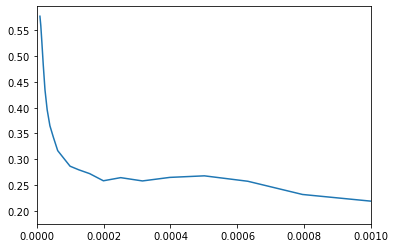

In [169]:
plt.plot(model.history.history['lr'],model.history.history['val_loss'])
plt.xlim(0,0.001)
#plt.ylim(0.2,0.4)

In [176]:
predictions=model.predict(test_x)
gini(y_test,predictions)

0.06658089311366082

In [177]:
model.save(f'D:/porto-seguro-safe-driver-prediction/models/nn_fold_{i}',save_format='tf')

INFO:tensorflow:Assets written to: D:/porto-seguro-safe-driver-prediction/models/nn_fold_4\assets


In [178]:
del model
import gc
gc.collect()

49170

# submission

In [21]:
import pickle

In [22]:
test=pd.read_csv('D:/porto-seguro-safe-driver-prediction/test.csv')
sub=pd.read_csv('D:/porto-seguro-safe-driver-prediction/sample_submission.csv')
with open('D:/porto-seguro-safe-driver-prediction/fill_values.pkl','rb') as f:
    fill_values=pickle.load(f)
for name,value in fill_values.items():
    test[name].replace(-1,value,inplace=True)

In [23]:
test.isna().sum()

id                0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


In [24]:
test.drop('id',axis=1,inplace=True)

In [25]:
with open('D:/porto-seguro-safe-driver-prediction/data/nn/numeric_columns.pkl','rb') as f:
    numeric_columns=pickle.load(f)

In [26]:
with open('D:porto-seguro-safe-driver-prediction/data/nn/dtypes.pkl','rb') as f:
    dtypes=pickle.load(f)

In [27]:
dtypes

{'ps_ind_02_cat': 'int8',
 'ps_ind_04_cat': 'int8',
 'ps_ind_05_cat': 'int8',
 'ps_car_01_cat': 'int8',
 'ps_car_02_cat': 'int8',
 'ps_car_03_cat': 'int8',
 'ps_car_04_cat': 'int8',
 'ps_car_05_cat': 'int8',
 'ps_car_06_cat': 'int8',
 'ps_car_07_cat': 'int8',
 'ps_car_08_cat': 'int8',
 'ps_car_09_cat': 'int8',
 'ps_car_10_cat': 'int8',
 'ps_car_11_cat': 'int8'}

In [28]:
with open('D:/porto-seguro-safe-driver-prediction/data/nn/categorical_columns.pkl','rb') as f:
    categorical_columns=pickle.load(f)

In [29]:
with open('D:/porto-seguro-safe-driver-prediction/data/nn/embedding_dims.pkl','rb') as f:
    embedding_dims=pickle.load(f)

In [30]:
with open('D:/porto-seguro-safe-driver-prediction/data/nn/nn_encoders.pkl','rb') as f:
    nn_encoders=pickle.load(f)

In [31]:
for col,encoder in nn_encoders.items():
    test[col]=encoder.transform(test[col])

In [32]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,1,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,0,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,0,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,0,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [33]:
for i in range(5):
    with open(f'D:/porto-seguro-safe-driver-prediction/data/nn/scaler_{i}.pkl','rb') as f:
        scaler=pickle.load(f)
    test_numeric=test.loc[:,numeric_columns].copy()
    test_category=test.loc[:,categorical_columns].copy()
    test_category=dict((col,np.cast[dtypes[col]](np.expand_dims(test_category[col].values,axis=-1))
                       ) for col in categorical_columns)
    test_numeric=scaler.transform(test_numeric)
    test_numeric={'numeric_data':test_numeric}
    test_numeric.update(test_category)
    model=tf.keras.models.load_model(f"D:/porto-seguro-safe-driver-prediction/models/nn_fold_{i}")
    predictions=model.predict(test_numeric)
    sub[f'target_{i}']=predictions


In [34]:
sub['target']=sub.apply(lambda x: (x['target_0']+x['target_1']+x['target_2']+x['target_3']+x['target_4'])/5,axis=1)
sub.drop(['target_0','target_1','target_2','target_3','target_4'],axis=1,inplace=True)

<AxesSubplot:>

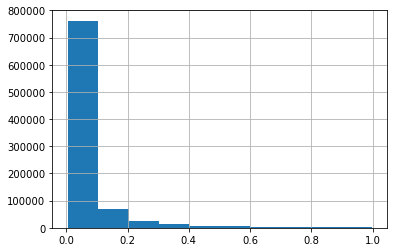

In [36]:
sub['target'].hist()

In [38]:
sub.to_csv('D:/porto-seguro-safe-driver-prediction/submissions/submission.csv',index=False)

## KNN with NN embeddings for categorical features

In [27]:
with open('D:/porto-seguro-safe-driver-prediction/data/nn/numeric_columns.pkl','rb') as f:
    numeric_columns=pickle.load(f)
with open('D:porto-seguro-safe-driver-prediction/data/nn/dtypes.pkl','rb') as f:
    dtypes=pickle.load(f)
with open('D:/porto-seguro-safe-driver-prediction/data/nn/categorical_columns.pkl','rb') as f:
    categorical_columns=pickle.load(f)
with open('D:/porto-seguro-safe-driver-prediction/data/nn/embedding_dims.pkl','rb') as f:
    embedding_dims=pickle.load(f)
with open('D:/porto-seguro-safe-driver-prediction/data/nn/nn_encoders.pkl','rb') as f:
    nn_encoders=pickle.load(f)

In [28]:
categorical_columns

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [37]:
total_dims=len(numeric_columns)
for col in embedding_dims.keys():
    total_dims+=embedding_dims[col]['output_dim']
total_dims

114

In [43]:
i=0

In [ ]:
model=tf.keras.models.load_model(f"D:/porto-seguro-safe-driver-prediction/models/nn_fold_{i}/")
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_train_numeric_{i}.pkl",'rb') as f:
    x_train_numeric=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_train_categorical_{i}.pkl",'rb') as f:
    x_train_cat=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/y_train_{i}.pkl",'rb') as f:
    y_train=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_test_numeric_{i}.pkl",'rb') as f:
    x_test_numeric=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/x_test_categorical_{i}.pkl",'rb') as f:
    x_test_cat=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/nn/y_test_{i}.pkl",'rb') as f:
    y_test=pickle.load(f)
train_data=np.empty((x_train_numeric.shape[0],114))
train_data[:,:43]=x_train_numeric
add_new=43
for i,col in enumerate(categorical_columns):
    embeddings=model.layers[i].get_weights()[0]
    one_hot=tf.keras.utils.to_categorical(x_train_cat[col],num_classes=embedding_dims[col]['input_dim'])
    final_embeds=tf.matmul(one_hot,embeddings)
    train_data[:,add_new:add_new+embedding_dims[col].get('output_dim')]=final_embeds
    add_new+=embedding_dims[col].get('output_dim')
########################################################################
test_data=np.empty((x_test_numeric.shape[0],114))
test_data[:,:43]=x_test_numeric
add_new=43
for i,col in enumerate(categorical_columns):
    embeddings=model.layers[i].get_weights()[0]
    one_hot=tf.keras.utils.to_categorical(x_test_cat[col],num_classes=embedding_dims[col]['input_dim'])
    final_embeds=tf.matmul(one_hot,embeddings)
    test_data[:,add_new:add_new+embedding_dims[col].get('output_dim')]=final_embeds
    add_new+=embedding_dims[col].get('output_dim')
####################################################################################
for n in tqdm(range(10,50,5)):
    neighbor_score={}
    print('fitting model')
    model=KNeighborsClassifier(n_neighbors=n,n_jobs=-1)
    model.fit(train_data,y_train)
    print('predicting')
    predictions=model.predict(test_data)
    score=gini(y_test,predictions)
    print(f"for {n} neighbors we got {score}")
    neighbor_score[n]=score


  0%|          | 0/8 [00:00<?, ?it/s]

fitting model
predicting


In [ ]:
plt.figure(figsize=(30,15))
sn.linplot(list(neighbor_score.keys()),list(neighbor_score.values))

## Auto encoders

In [10]:
#df.head()

In [29]:
df.drop('id',axis=1,inplace=True)

In [30]:
with open('D:/porto-seguro-safe-driver-prediction/data/nn/numeric_columns.pkl','rb') as f:
    numeric_columns=pickle.load(f)
with open('D:porto-seguro-safe-driver-prediction/data/nn/dtypes.pkl','rb') as f:
    dtypes=pickle.load(f)
with open('D:/porto-seguro-safe-driver-prediction/data/nn/categorical_columns.pkl','rb') as f:
    categorical_columns=pickle.load(f)
with open('D:/porto-seguro-safe-driver-prediction/data/nn/embedding_dims.pkl','rb') as f:
    embedding_dims=pickle.load(f)
with open('D:/porto-seguro-safe-driver-prediction/data/nn/nn_encoders.pkl','rb') as f:
    nn_encoders=pickle.load(f)

In [31]:
anomaly=df[df['target']==1].drop('target',axis=1).reset_index(drop=True)
normal=df[df['target']==0].drop('target',axis=1).reset_index(drop=True)

In [32]:
normal.shape

(573518, 57)

In [33]:
anomaly.shape

(21694, 57)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
train,vt=train_test_split(normal,test_size=0.10)

In [38]:
train.reset_index(drop=True,inplace=True)
vt.reset_index(drop=True,inplace=True)

In [39]:
valid,test=train_test_split(vt,test_size=0.5)

In [40]:
valid.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [41]:
nn_encoders

{'ps_ind_02_cat': LabelEncoder(),
 'ps_ind_04_cat': LabelEncoder(),
 'ps_ind_05_cat': LabelEncoder(),
 'ps_car_01_cat': LabelEncoder(),
 'ps_car_02_cat': LabelEncoder(),
 'ps_car_03_cat': LabelEncoder(),
 'ps_car_04_cat': LabelEncoder(),
 'ps_car_05_cat': LabelEncoder(),
 'ps_car_06_cat': LabelEncoder(),
 'ps_car_07_cat': LabelEncoder(),
 'ps_car_08_cat': LabelEncoder(),
 'ps_car_09_cat': LabelEncoder(),
 'ps_car_10_cat': LabelEncoder(),
 'ps_car_11_cat': LabelEncoder()}

In [42]:
train_numeric_data=train.loc[:,numeric_columns].copy()
train_categorical_data=train.loc[:,categorical_columns].copy()
##########################################################
valid_numeric_data=valid.loc[:,numeric_columns].copy()
valid_categorical_data=valid.loc[:,categorical_columns].copy()
##########################################################
test_numeric_data=valid.loc[:,numeric_columns].copy()
test_categorical_data=valid.loc[:,categorical_columns].copy()
##########################################################
scaler=StandardScaler()
train_numeric_data=scaler.fit_transform(train_numeric_data)
valid_numeric_data=scaler.transform(valid_numeric_data)
test_numeric_data=scaler.transform(test_numeric_data)
##########################################################
for col,encoder in nn_encoders.items():
    train_categorical_data[col]=encoder.transform(train_categorical_data[col])
    valid_categorical_data[col]=encoder.transform(valid_categorical_data[col])
    test_categorical_data[col]=encoder.transform(test_categorical_data[col])
##########################################################
train_categorical_data=dict((col,np.expand_dims(train_categorical_data[col].values,axis=-1)) for col in train_categorical_data)
valid_categorical_data=dict((col,np.expand_dims(valid_categorical_data[col].values,axis=-1)) for col in valid_categorical_data)
test_categorical_data=dict((col,np.expand_dims(test_categorical_data[col].values,axis=-1)) for col in test_categorical_data)
##########################################################
with open('D:/porto-seguro-safe-driver-prediction/data/autoencoder/scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
with open("D:/porto-seguro-safe-driver-prediction/data/autoencoder/train_numeric_data.pkl",'wb') as f:
    pickle.dump(train_numeric_data,f)
with open("D:/porto-seguro-safe-driver-prediction/data/autoencoder/train_categorical_data.pkl",'wb') as f:
    pickle.dump(train_categorical_data,f)
with open("D:/porto-seguro-safe-driver-prediction/data/autoencoder/valid_numeric_data.pkl",'wb') as f:
    pickle.dump(valid_numeric_data,f)
with open("D:/porto-seguro-safe-driver-prediction/data/autoencoder/valid_categorical_data.pkl",'wb') as f:
    pickle.dump(valid_categorical_data,f)
with open("D:/porto-seguro-safe-driver-prediction/data/autoencoder/test_numeric_data.pkl",'wb') as f:
    pickle.dump(test_numeric_data,f)
with open("D:/porto-seguro-safe-driver-prediction/data/autoencoder/test_categorical_data.pkl",'wb') as f:
    pickle.dump(test_categorical_data,f)
import optuna

In [35]:
from tensorflow.keras.layers import Dense,ReLU,BatchNormalization,Dropout,Input,Embedding,Reshape,Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [36]:
with open(f"D:/porto-seguro-safe-driver-prediction/data/autoencoder/train_numeric_data.pkl",'rb') as f:
    train_numeric_data=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/autoencoder/train_categorical_data.pkl",'rb') as f:
    train_categorical_data=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/autoencoder/valid_numeric_data.pkl",'rb') as f:
    valid_numeric_data=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/autoencoder/valid_categorical_data.pkl",'rb') as f:
    valid_categorical_data=pickle.load(f)

In [11]:
len(categorical_columns)+len(numeric_columns)

57

In [12]:
def get_params(trial):
    parameters={}
    parameters['units']=[]
    n_layers=trial.suggest_int('n_layers',2,6)
    parameters['n_layers']=n_layers
    for i in range(n_layers):
        if i==0:
            units=trial.suggest_int(f'units_{i}',50,120)
            parameters['units'].append(units)
        else:
            units=trial.suggest_int(f'units_{i}',50,90)
            parameters['units'].append(units)
            drop_or_not=trial.suggest_categorical(f'drop_or_not_{i}',['yes','no'])
            parameters[f'drop_{i}']=drop_or_not
            if drop_or_not=='yes':
                rate=trial.suggest_discrete_uniform(f"droprate_{i}",0.05,0.8,0.05)
                parameters[f'droprate_{i}']=rate
    parameters['bottleneck_unit']=trial.suggest_int(f'bottleneck',10,30)
    return parameters    

In [38]:
#train.head()

In [39]:
#train.shape

In [40]:
embedding_dims

{'ps_ind_02_cat': {'input_dim': 4, 'output_dim': 3},
 'ps_ind_04_cat': {'input_dim': 2, 'output_dim': 2},
 'ps_ind_05_cat': {'input_dim': 7, 'output_dim': 5},
 'ps_car_01_cat': {'input_dim': 12, 'output_dim': 6},
 'ps_car_02_cat': {'input_dim': 2, 'output_dim': 2},
 'ps_car_03_cat': {'input_dim': 3, 'output_dim': 3},
 'ps_car_04_cat': {'input_dim': 10, 'output_dim': 6},
 'ps_car_05_cat': {'input_dim': 3, 'output_dim': 3},
 'ps_car_06_cat': {'input_dim': 18, 'output_dim': 8},
 'ps_car_07_cat': {'input_dim': 2, 'output_dim': 2},
 'ps_car_08_cat': {'input_dim': 2, 'output_dim': 2},
 'ps_car_09_cat': {'input_dim': 5, 'output_dim': 4},
 'ps_car_10_cat': {'input_dim': 3, 'output_dim': 3},
 'ps_car_11_cat': {'input_dim': 104, 'output_dim': 22}}

In [41]:
train_numeric_data.shape[1]

43

In [42]:
57-43

14

the output layers are 43 dimensions linear and 14 softmax layers with each units are input_dims in embeddings

In [14]:
#class auto_encoder(tf.keras.Model):
#    def __init__(self,categorical_columns,embedding_dims,parameters):
#        super(auto_encoder,self).__init__()
#        self.categorical_columns=categorical_columns
#        self.params=parameters
#        self.embed_dims=embedding_dims
#        self.embedding_layers=[Embedding(self.embed_dims[col].get('input_dim'),self.embed_dims[col].get('output_dim')
#                                         ,input_length=1) for col in self.categorical_columns]
#        self.reshape_layers=[Reshape(target_shape=(self.embed_dims[col].get('output_dim'),))
#                             for col in self.categorical_columns]
#        self.dense_layers=[Dense(units=i,activation='relu') for i in self.params['units']]
#        self.concat_layer=tf.keras.layers.Concatenate()
#        self.reverse_dense_layers=[Dense(units=i,activation='relu') for i in self.params['units']]
#        self.bottleneck_layer=Dense(parameters['bottleneck_unit'],activation='relu')
#        self.numeric_output=Dense(43,activation='linear')
#        self.cat_outputs=dict((col,Dense(units=self.embed_dims[col].get('input_dim'),activation='softmax'))
#                         for col in self.categorical_columns)
#        
#    def call(self,inputs):##dict inputs->key:col,value:data for categories and numeric key contrains all numeric data
#        numeric_data=inputs.get('numeric_data')
#        embed_layers=[]
#        for i,col in enumerate(self.categorical_columns):
#            data=inputs.get(col)
#            x=self.embedding_layers[i](data)
#            x=self.reshape_layers[i](x)
#            embed_layers.append(x)
#        embed_layers.append(numeric_data)
#        n_layers=self.params['n_layers']
#        for i in range(n_layers):
#            if i==0:
#                x=self.concat_layer(embed_layers)
#                x=self.dense_layers[i](x)
#            else:
#                x=self.dense_layers[i](x)
#                if self.params[f'drop_{i}']=='yes':
#                    x=Dropout(self.params[f'droprate_{i}'])(x)
#        x=self.bottleneck_layer(x)
#        for i in reversed(range(n_layers)):
#            if i==0:
#                x=self.reverse_dense_layers[i](x)
#            else:
#                x=self.reverse_dense_layers[i](x)
#                if self.params[f'drop_{i}']=='yes':
#                    x=Dropout(self.params[f'droprate_{i}'])(x)
#        num_out=self.numeric_output(x)
#        final_out={'numeric_data':num_out}
#        for col,l in self.cat_outputs.items():
#            final_out.update({col:l(x)})
#        return final_out

In [45]:
train_data={'numeric_data':train_numeric_data}
train_data.update(train_categorical_data)
valid_data={'numeric_data':valid_numeric_data}
valid_data.update(valid_categorical_data)

In [16]:
def get_model(params,embedding_dims,input_keys):
    inputs={}
    outputs={}
    l=[]
    for key in input_keys:
        if key=='numeric_data':
            inputs[key]=Input((43,),name=key)
            l.append(inputs[key])
        else:
            inputs[key]=Input((1,),name=key)
            x=Embedding(embedding_dims[key].get('input_dim'),embedding_dims[key].get('output_dim'),input_length=1)(inputs[key])
            x=Reshape(target_shape=(embedding_dims[key].get('output_dim'),))(x)
            l.append(x)
    x=tf.keras.layers.Concatenate()(l)
    for i,unit in enumerate(params['units']):
        if i==0:
            x=Dense(units=unit,activation='relu')(x)
        else:
            x=Dense(units=unit,activation='relu')(x)
            if params[f'drop_{i}']=='yes':
                x=Dropout(params[f'droprate_{i}'])(x)
    x=Dense(params['bottleneck_unit'],activation='relu')(x)
    for i in reversed(range(params['n_layers'])):
        if i==0:
            x=Dense(units=params['units'][i],activation='relu')(x)
        else:
            x=Dense(units=params['units'][i],activation='relu')(x)
            if params[f'drop_{i}']=='yes':
                x=Dropout(params[f'droprate_{i}'])(x)
    outputs['numeric_data']=Dense(43,activation='linear',name='numeric_output')(x)
    for col in embedding_dims.keys():
        outputs[col]=Dense(units=embedding_dims[col].get('input_dim'),activation='softmax',name=f'{col}_output')(x)
    model=tf.keras.models.Model(inputs,outputs)
    return model

In [17]:
def objective(trial):
    params=get_params(trial)
    tf.keras.backend.clear_session()
    input_keys=['numeric_data',
     'ps_ind_02_cat',
     'ps_ind_04_cat',
     'ps_ind_05_cat',
     'ps_car_01_cat',
     'ps_car_02_cat',
     'ps_car_03_cat',
     'ps_car_04_cat',
     'ps_car_05_cat',
     'ps_car_06_cat',
     'ps_car_07_cat',
     'ps_car_08_cat',
     'ps_car_09_cat',
     'ps_car_10_cat',
     'ps_car_11_cat']
    losses={}
    for key in input_keys:
        if key=='numeric_data':
            losses['numeric_data']='mse'
        else:
            losses[f"{key}"]='sparse_categorical_crossentropy'
    model=get_model(params,embedding_dims,input_keys)
    model.compile(optimizer='Adam',loss=losses)
    #early=tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss',mode='min',verbose=True)
    model.fit(x=train_data,y=train_data,validation_data=(valid_data,valid_data),epochs=15,
              batch_size=4096,validation_batch_size=1024,verbose=0)
    result=min(model.history.history['val_loss'])
    if model.history.history['val_loss'].index(result)<5:
        result=50
    del model
    gc.collect()
    return result
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

[I 2021-06-30 20:00:44,051] A new study created in memory with name: no-name-6395c113-fedf-4440-94a0-3b2097a01b9a
C:\Users\beast brothers\anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


[I 2021-06-30 20:02:27,684] Trial 0 finished with value: 50.0 and parameters: {'n_layers': 4, 'units_0': 83, 'units_1': 68, 'drop_or_not_1': 'no', 'units_2': 86, 'drop_or_not_2': 'yes', 'droprate_2': 0.6000000000000001, 'units_3': 85, 'drop_or_not_3': 'yes', 'droprate_3': 0.6500000000000001, 'bottleneck': 23}. Best is trial 0 with value: 50.0.
[I 2021-06-30 20:04:16,724] Trial 1 finished with value: 1.5297503471374512 and parameters: {'n_layers': 3, 'units_0': 97, 'units_1': 52, 'drop_or_not_1': 'no', 'units_2': 72, 'drop_or_not_2': 'no', 'bottleneck': 18}. Best is trial 1 with value: 1.5297503471374512.
[I 2021-06-30 20:06:10,422] Trial 2 finished with value: 6.945297718048096 and parameters: {'n_layers': 4, 'units_0': 91, 'units_1': 80, 'drop_or_not_1': 'yes', 'droprate_1': 0.4, 'units_2': 53, 'drop_or_not_2': 'yes', 'droprate_2': 0.15000000000000002, 'units_3': 85, 'drop_or_not_3': 'no', 'bottleneck': 21}. Best is trial 1 with value: 1.5297503471374512.
[I 2021-06-30 20:08:03,213] T

[I 2021-06-30 20:50:59,324] Trial 28 finished with value: 1.1458067893981934 and parameters: {'n_layers': 3, 'units_0': 68, 'units_1': 87, 'drop_or_not_1': 'no', 'units_2': 56, 'drop_or_not_2': 'no', 'bottleneck': 28}. Best is trial 27 with value: 0.7720391154289246.
[I 2021-06-30 20:52:51,886] Trial 29 finished with value: 50.0 and parameters: {'n_layers': 6, 'units_0': 81, 'units_1': 82, 'drop_or_not_1': 'no', 'units_2': 76, 'drop_or_not_2': 'no', 'units_3': 62, 'drop_or_not_3': 'yes', 'droprate_3': 0.8, 'units_4': 74, 'drop_or_not_4': 'yes', 'droprate_4': 0.8, 'units_5': 50, 'drop_or_not_5': 'yes', 'droprate_5': 0.25, 'bottleneck': 30}. Best is trial 27 with value: 0.7720391154289246.
[I 2021-06-30 20:54:28,617] Trial 30 finished with value: 0.7574549317359924 and parameters: {'n_layers': 2, 'units_0': 82, 'units_1': 89, 'drop_or_not_1': 'no', 'bottleneck': 28}. Best is trial 30 with value: 0.7574549317359924.
[I 2021-06-30 20:56:04,670] Trial 31 finished with value: 0.6858035326004

[I 2021-06-30 21:44:07,985] Trial 59 finished with value: 1.4889190196990967 and parameters: {'n_layers': 2, 'units_0': 103, 'units_1': 70, 'drop_or_not_1': 'no', 'bottleneck': 13}. Best is trial 57 with value: 0.5592190027236938.
[I 2021-06-30 21:46:02,767] Trial 60 finished with value: 1.1817179918289185 and parameters: {'n_layers': 3, 'units_0': 109, 'units_1': 83, 'drop_or_not_1': 'no', 'units_2': 67, 'drop_or_not_2': 'no', 'bottleneck': 25}. Best is trial 57 with value: 0.5592190027236938.
[I 2021-06-30 21:47:53,664] Trial 61 finished with value: 0.6683545112609863 and parameters: {'n_layers': 2, 'units_0': 92, 'units_1': 86, 'drop_or_not_1': 'no', 'bottleneck': 29}. Best is trial 57 with value: 0.5592190027236938.
[I 2021-06-30 21:49:43,020] Trial 62 finished with value: 0.8032010197639465 and parameters: {'n_layers': 2, 'units_0': 99, 'units_1': 88, 'drop_or_not_1': 'no', 'bottleneck': 29}. Best is trial 57 with value: 0.5592190027236938.
[I 2021-06-30 21:51:27,435] Trial 63 fin

[I 2021-06-30 22:44:56,549] Trial 92 finished with value: 0.7431060075759888 and parameters: {'n_layers': 2, 'units_0': 107, 'units_1': 80, 'drop_or_not_1': 'no', 'bottleneck': 30}. Best is trial 83 with value: 0.5048853754997253.
[I 2021-06-30 22:46:37,064] Trial 93 finished with value: 0.691533625125885 and parameters: {'n_layers': 2, 'units_0': 114, 'units_1': 87, 'drop_or_not_1': 'no', 'bottleneck': 30}. Best is trial 83 with value: 0.5048853754997253.
[I 2021-06-30 22:48:15,252] Trial 94 finished with value: 0.6937119364738464 and parameters: {'n_layers': 2, 'units_0': 104, 'units_1': 89, 'drop_or_not_1': 'no', 'bottleneck': 29}. Best is trial 83 with value: 0.5048853754997253.
[I 2021-06-30 22:49:54,446] Trial 95 finished with value: 0.6487022042274475 and parameters: {'n_layers': 2, 'units_0': 110, 'units_1': 85, 'drop_or_not_1': 'no', 'bottleneck': 30}. Best is trial 83 with value: 0.5048853754997253.
[I 2021-06-30 22:51:38,867] Trial 96 finished with value: 0.7233720421791077 

In [18]:
study.best_params

{'n_layers': 2,
 'units_0': 108,
 'units_1': 86,
 'drop_or_not_1': 'no',
 'bottleneck': 30}

In [20]:
study.best_value

0.5048853754997253

In [ ]:
{'n_layers': 2,
 'units_0': 108,
 'units_1': 86,
 'drop_or_not_1': 'no',
 'bottleneck': 30}


In [17]:
params={'n_layers':2,'units':[108,86],'drop_1':'no','bottleneck_unit':30}

In [18]:
input_keys=['numeric_data',
     'ps_ind_02_cat',
     'ps_ind_04_cat',
     'ps_ind_05_cat',
     'ps_car_01_cat',
     'ps_car_02_cat',
     'ps_car_03_cat',
     'ps_car_04_cat',
     'ps_car_05_cat',
     'ps_car_06_cat',
     'ps_car_07_cat',
     'ps_car_08_cat',
     'ps_car_09_cat',
     'ps_car_10_cat',
     'ps_car_11_cat']
tf.keras.backend.clear_session()
model=get_model(params,embedding_dims,input_keys)

In [ ]:
model.summary()

In [34]:
saver=tf.keras.callbacks.ModelCheckpoint(filepath='D:/porto-seguro-safe-driver-prediction/models/auto_3.h5',
                                        save_best_only=True,save_freq='epoch',monitor='val_loss',
                                        mode='min',verbose=1)

In [35]:
losses={}
for key in input_keys:
    if key=='numeric_data':
        losses['numeric_data']='mse'
    else:
        losses[f"{key}"]='sparse_categorical_crossentropy'
model.compile(optimizer='Adam'
              ,loss=losses)
#early=tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss',mode='min',verbose=True)
model.fit(x=train_data,y=train_data,validation_data=(valid_data,valid_data),epochs=35,
          batch_size=4096,validation_batch_size=1024,callbacks=[saver])

Epoch 1/35
127/127 [==============================] - 11s 50ms/step - loss: 15.2036 - numeric_output_loss: 0.9707 - ps_car_01_cat_output_loss: 1.7122 - ps_car_02_cat_output_loss: 0.3498 - ps_car_03_cat_output_loss: 0.7719 - ps_car_04_cat_output_loss: 0.6547 - ps_car_05_cat_output_loss: 0.9339 - ps_car_06_cat_output_loss: 2.0751 - ps_car_07_cat_output_loss: 0.2291 - ps_car_08_cat_output_loss: 0.3932 - ps_car_09_cat_output_loss: 0.9492 - ps_car_10_cat_output_loss: 0.1419 - ps_car_11_cat_output_loss: 3.9365 - ps_ind_02_cat_output_loss: 0.8007 - ps_ind_04_cat_output_loss: 0.6312 - ps_ind_05_cat_output_loss: 0.6534 - val_loss: 10.2193 - val_numeric_output_loss: 0.9726 - val_ps_car_01_cat_output_loss: 1.1969 - val_ps_car_02_cat_output_loss: 0.2256 - val_ps_car_03_cat_output_loss: 0.4488 - val_ps_car_04_cat_output_loss: 0.2667 - val_ps_car_05_cat_output_loss: 0.5307 - val_ps_car_06_cat_output_loss: 1.3191 - val_ps_car_07_cat_output_loss: 0.1890 - val_ps_car_08_cat_output_loss: 0.2348 - val_ps


Epoch 00012: val_loss improved from 0.85332 to 0.75285, saving model to D:/porto-seguro-safe-driver-prediction/models\auto_3.h5
Epoch 13/35
127/127 [==============================] - 7s 53ms/step - loss: 0.6981 - numeric_output_loss: 0.5622 - ps_car_01_cat_output_loss: 0.0211 - ps_car_02_cat_output_loss: 0.0034 - ps_car_03_cat_output_loss: 0.0121 - ps_car_04_cat_output_loss: 0.0140 - ps_car_05_cat_output_loss: 0.0044 - ps_car_06_cat_output_loss: 0.0086 - ps_car_07_cat_output_loss: 0.0040 - ps_car_08_cat_output_loss: 0.0028 - ps_car_09_cat_output_loss: 0.0126 - ps_car_10_cat_output_loss: 0.0040 - ps_car_11_cat_output_loss: 0.0178 - ps_ind_02_cat_output_loss: 0.0070 - ps_ind_04_cat_output_loss: 2.8891e-04 - ps_ind_05_cat_output_loss: 0.0237 - val_loss: 0.7144 - val_numeric_output_loss: 0.5781 - val_ps_car_01_cat_output_loss: 0.0208 - val_ps_car_02_cat_output_loss: 0.0029 - val_ps_car_03_cat_output_loss: 0.0121 - val_ps_car_04_cat_output_loss: 0.0152 - val_ps_car_05_cat_output_loss: 0.00


Epoch 00018: val_loss improved from 0.64620 to 0.61284, saving model to D:/porto-seguro-safe-driver-prediction/models\auto_3.h5
Epoch 19/35
127/127 [==============================] - 7s 55ms/step - loss: 0.5644 - numeric_output_loss: 0.4952 - ps_car_01_cat_output_loss: 0.0107 - ps_car_02_cat_output_loss: 0.0022 - ps_car_03_cat_output_loss: 0.0059 - ps_car_04_cat_output_loss: 0.0080 - ps_car_05_cat_output_loss: 0.0023 - ps_car_06_cat_output_loss: 0.0040 - ps_car_07_cat_output_loss: 0.0032 - ps_car_08_cat_output_loss: 0.0019 - ps_car_09_cat_output_loss: 0.0077 - ps_car_10_cat_output_loss: 0.0016 - ps_car_11_cat_output_loss: 0.0079 - ps_ind_02_cat_output_loss: 0.0044 - ps_ind_04_cat_output_loss: 4.9804e-04 - ps_ind_05_cat_output_loss: 0.0089 - val_loss: 0.6606 - val_numeric_output_loss: 0.5783 - val_ps_car_01_cat_output_loss: 0.0115 - val_ps_car_02_cat_output_loss: 0.0022 - val_ps_car_03_cat_output_loss: 0.0076 - val_ps_car_04_cat_output_loss: 0.0084 - val_ps_car_05_cat_output_loss: 0.00


Epoch 00024: val_loss did not improve from 0.55644
Epoch 25/35
127/127 [==============================] - 7s 56ms/step - loss: 0.5098 - numeric_output_loss: 0.4615 - ps_car_01_cat_output_loss: 0.0076 - ps_car_02_cat_output_loss: 0.0018 - ps_car_03_cat_output_loss: 0.0035 - ps_car_04_cat_output_loss: 0.0060 - ps_car_05_cat_output_loss: 0.0016 - ps_car_06_cat_output_loss: 0.0023 - ps_car_07_cat_output_loss: 0.0028 - ps_car_08_cat_output_loss: 0.0018 - ps_car_09_cat_output_loss: 0.0053 - ps_car_10_cat_output_loss: 9.0381e-04 - ps_car_11_cat_output_loss: 0.0051 - ps_ind_02_cat_output_loss: 0.0035 - ps_ind_04_cat_output_loss: 5.8288e-04 - ps_ind_05_cat_output_loss: 0.0054 - val_loss: 0.5620 - val_numeric_output_loss: 0.4889 - val_ps_car_01_cat_output_loss: 0.0259 - val_ps_car_02_cat_output_loss: 0.0014 - val_ps_car_03_cat_output_loss: 0.0045 - val_ps_car_04_cat_output_loss: 0.0072 - val_ps_car_05_cat_output_loss: 0.0018 - val_ps_car_06_cat_output_loss: 0.0026 - val_ps_car_07_cat_output_los

127/127 [==============================] - 8s 60ms/step - loss: 0.4654 - numeric_output_loss: 0.4328 - ps_car_01_cat_output_loss: 0.0042 - ps_car_02_cat_output_loss: 9.2569e-04 - ps_car_03_cat_output_loss: 0.0024 - ps_car_04_cat_output_loss: 0.0040 - ps_car_05_cat_output_loss: 0.0012 - ps_car_06_cat_output_loss: 0.0014 - ps_car_07_cat_output_loss: 0.0019 - ps_car_08_cat_output_loss: 0.0020 - ps_car_09_cat_output_loss: 0.0044 - ps_car_10_cat_output_loss: 5.5535e-04 - ps_car_11_cat_output_loss: 0.0035 - ps_ind_02_cat_output_loss: 0.0018 - ps_ind_04_cat_output_loss: 5.8450e-04 - ps_ind_05_cat_output_loss: 0.0038 - val_loss: 0.5128 - val_numeric_output_loss: 0.4751 - val_ps_car_01_cat_output_loss: 0.0049 - val_ps_car_02_cat_output_loss: 7.9734e-04 - val_ps_car_03_cat_output_loss: 0.0023 - val_ps_car_04_cat_output_loss: 0.0048 - val_ps_car_05_cat_output_loss: 0.0014 - val_ps_car_06_cat_output_loss: 0.0028 - val_ps_car_07_cat_output_loss: 0.0013 - val_ps_car_08_cat_output_loss: 0.0015 - val_

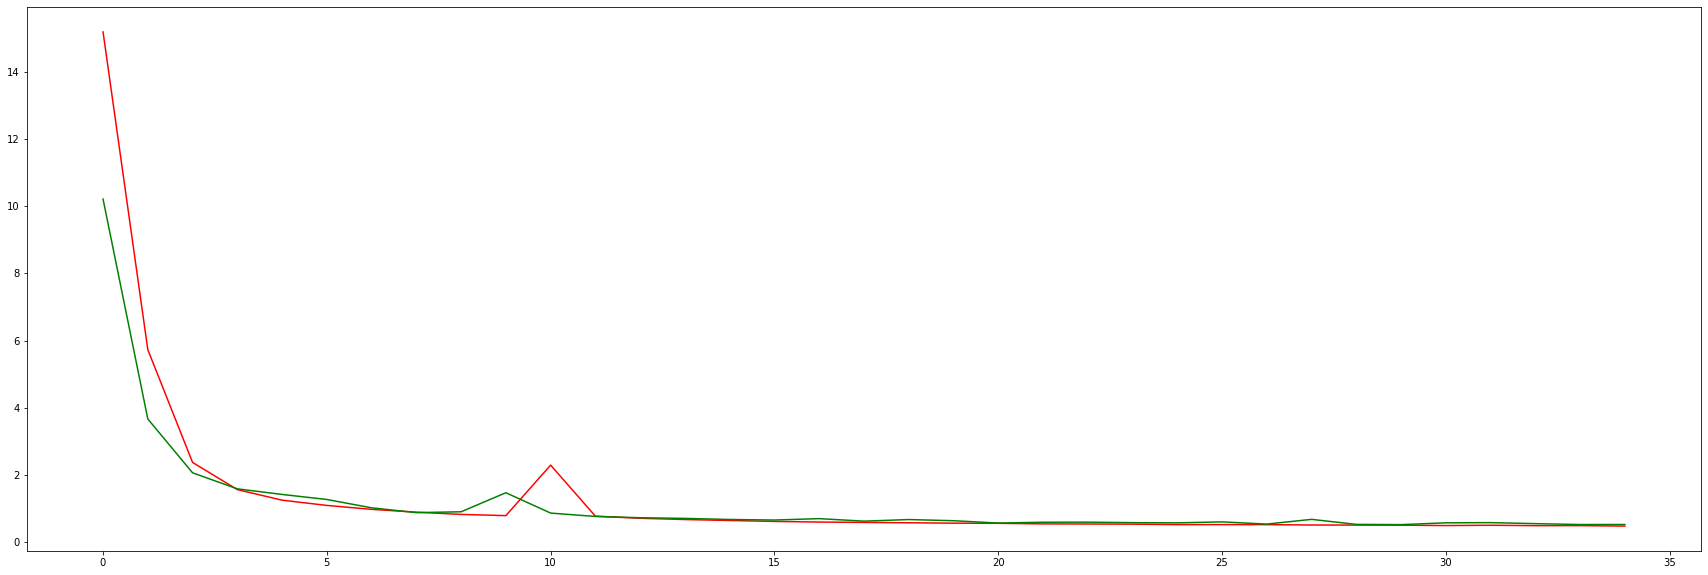

In [36]:
plt.figure(figsize=(30,10))
plt.plot(list(range(35)),model.history.history['loss'],color='r')
plt.plot(list(range(35)),model.history.history['val_loss'],color='g')

In [37]:
pd.DataFrame({'loss':model.history.history['loss'],'val_loss':model.history.history['val_loss']})

,loss,val_loss
0,15.203609,10.219299
1,5.729115,3.660437
2,2.363799,2.054610
3,1.553866,1.576165
4,1.238463,1.409393
5,1.081990,1.258967
6,0.964626,1.010430
7,0.880646,0.866574
8,0.813509,0.892362
9,0.777800,1.460240


finding threshold

In [43]:
model=tf.keras.models.load_model('D:/porto-seguro-safe-driver-prediction/models/auto_3.h5')

In [86]:
def loss_cal(y_true,y_pred):
    input_keys=['numeric_data',
     'ps_ind_02_cat',
     'ps_ind_04_cat',
     'ps_ind_05_cat',
     'ps_car_01_cat',
     'ps_car_02_cat',
     'ps_car_03_cat',
     'ps_car_04_cat',
     'ps_car_05_cat',
     'ps_car_06_cat',
     'ps_car_07_cat',
     'ps_car_08_cat',
     'ps_car_09_cat',
     'ps_car_10_cat',
     'ps_car_11_cat']
    losses=[]
    for key in input_keys:
        if key=='numeric_data':
            losses.extend(tf.keras.losses.mean_squared_error(y_true['numeric_data'],y_pred['numeric_data']).numpy())
        else:
            losses.extend(tf.keras.losses.sparse_categorical_crossentropy(y_true[key],y_pred[key]).numpy())
    return sum(losses)


In [87]:
def get_loss(data,model):
    input_keys=['numeric_data',
     'ps_ind_02_cat',
     'ps_ind_04_cat',
     'ps_ind_05_cat',
     'ps_car_01_cat',
     'ps_car_02_cat',
     'ps_car_03_cat',
     'ps_car_04_cat',
     'ps_car_05_cat',
     'ps_car_06_cat',
     'ps_car_07_cat',
     'ps_car_08_cat',
     'ps_car_09_cat',
     'ps_car_10_cat',
     'ps_car_11_cat']
    loss_dis=[]
    for i in tqdm(range(data['numeric_data'].shape[0])):
        temp={}
        for key in input_keys:
            temp[key]=np.expand_dims(data[key][i,],axis=0)
        result=model.predict(temp)
        loss_dis.append(loss_cal(temp,result))
    return loss_dis

In [88]:
valid_loss=get_loss(valid_data,model)

100%|██████████| 28676/28676 [1:38:40<00:00,  4.84it/s]   


In [91]:
pd.Series(valid_loss).describe()

count    28676.000000
mean         0.509434
std          0.500194
min          0.078483
25%          0.348312
50%          0.445226
75%          0.566739
max         36.260758
dtype: float64

(array([2.8573e+04, 7.6000e+01, 2.3000e+01, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.07848273,  3.6967103 ,  7.31493786, 10.93316543, 14.55139299,
        18.16962056, 21.78784812, 25.40607569, 29.02430325, 32.64253081,
        36.26075838]),
 <BarContainer object of 10 artists>)

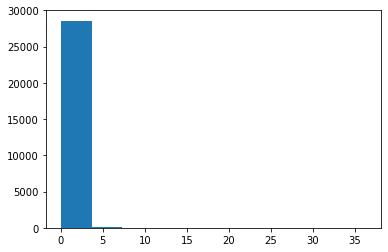

In [89]:
plt.hist(valid_loss)

In [92]:
with open(f"D:/porto-seguro-safe-driver-prediction/data/autoencoder/test_numeric_data.pkl",'rb') as f:
    test_numeric_data=pickle.load(f)
with open(f"D:/porto-seguro-safe-driver-prediction/data/autoencoder/test_categorical_data.pkl",'rb') as f:
    test_categorical_data=pickle.load(f)
test_data={'numeric_data':test_numeric_data}
test_data.update(test_categorical_data)

In [93]:
anomalynumeric_data=anomaly.loc[:,numeric_columns].copy()
anomalycategorical_data=anomaly.loc[:,categorical_columns].copy()
with open('D:/porto-seguro-safe-driver-prediction/data/autoencoder/scaler.pkl','rb') as f:
    scaler=pickle.load(f)
anomalynumeric_data=scaler.transform(anomalynumeric_data)
for col,encoder in nn_encoders.items():
    anomalycategorical_data[col]=encoder.transform(anomalycategorical_data[col])
anomalycategorical_data=dict((col,np.expand_dims(anomalycategorical_data[col].values,axis=-1)) for col in anomalycategorical_data)
anomalydata={'numeric_data':anomalynumeric_data}
anomalydata.update(anomalycategorical_data)

In [94]:
test_loss=get_loss(test_data,model)
anomaly_loss=get_loss(anomalydata,model)

100%|██████████| 21694/21694 [1:17:33<00:00,  4.66it/s]   


In [95]:
n_error=np.array(test_loss)
a_error=np.array(anomaly_loss)

In [96]:
import warnings
warnings.filterwarnings(action='ignore')

In [97]:
pd.Series(n_error).describe()

count    28676.000000
mean         0.509434
std          0.500194
min          0.078483
25%          0.348312
50%          0.445226
75%          0.566739
max         36.260758
dtype: float64

In [98]:
pd.Series(a_error).describe()

count    21694.000000
mean         0.554253
std          0.576089
min          0.095784
25%          0.364681
50%          0.466161
75%          0.596868
max         23.468851
dtype: float64

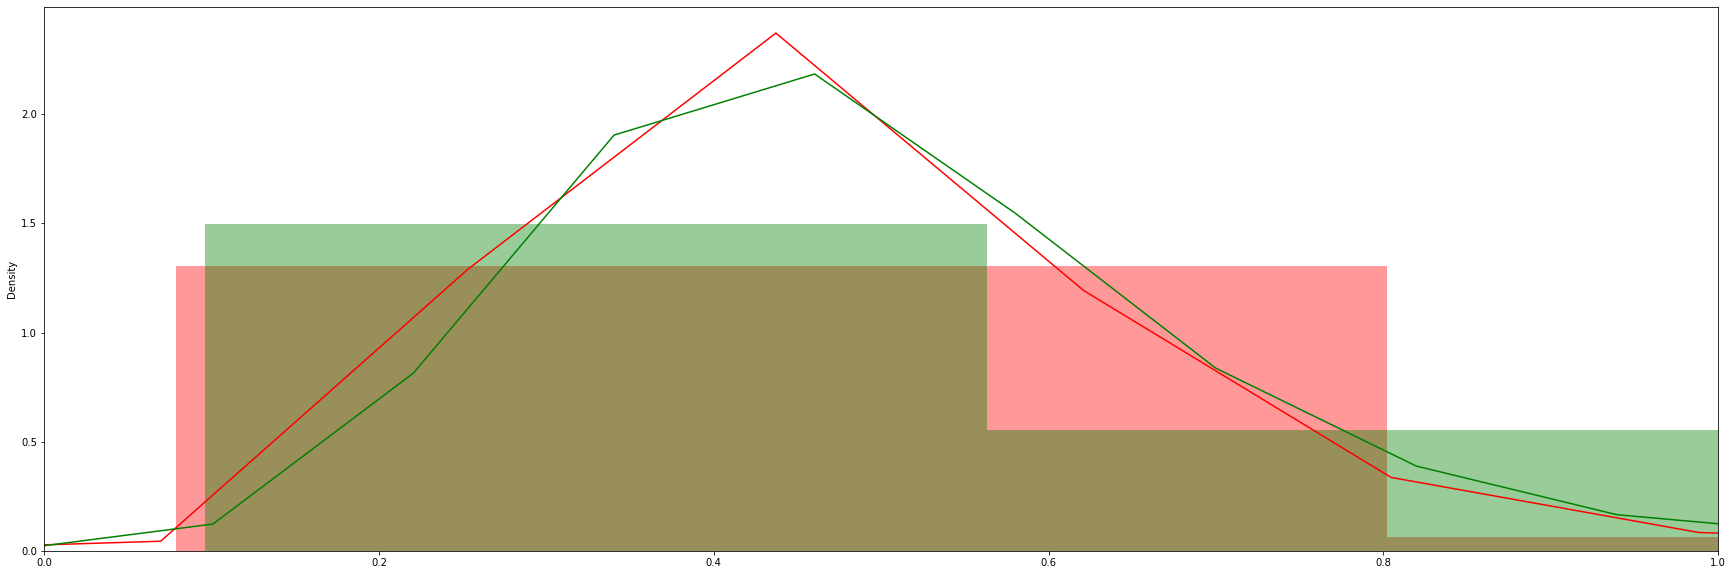

In [99]:
fig,ax=plt.subplots(figsize=(30,10))
sn.distplot(n_error,ax=ax,color='r')
sn.distplot(a_error,ax=ax,color='g')
plt.xlim(0,1)
plt.show()

In [126]:
from sklearn.metrics import classification_report

In [127]:
true_values=[0]*n_error.shape[0]
true_values.extend([1]*a_error.shape[0])

In [144]:
predictions=list(np.where(n_error>0.014697,1,0))
predictions.extend(list(np.where(a_error>0.014697,1,0)))

In [146]:
print(classification_report(np.array(true_values),np.array(predictions)))

              precision    recall  f1-score   support

           0       0.59      0.75      0.66     28676
           1       0.49      0.32      0.39     21694

    accuracy                           0.57     50370
   macro avg       0.54      0.54      0.53     50370
weighted avg       0.55      0.57      0.55     50370

